# 1. Overview

## Customer Lifetime Value

## Context
Customer lifetime value, or CLV, is a measure of how valuable a customer is to a company. From this value, the company can determine how much profit is obtained from one passenger and the costs incurred to acquire or retain new customers. This number is quite important for a company to know if the company wants to target marketing to valuable customers effectively and how the company's customers will change in the future.

## Dataset Features
- Vehicle Class
- Coverage
- Renew Offer Type
- Employment Status
- Marital Status
- Education
- Number of Policies
- Monthly Premium Auto
- Total Claim Amount
- Income
- Customer Lifetime Value

## Business Problem Reflection and Stakeholder Identification
Customer Lifetime Value (CLV) prediction is crucial for businesses as it helps identify the most valuable customers,
optimize marketing spend by targeting potential higher CLV customers, improve customer retention strategies, and forecast future revenue.

Key Stakeholders:
- Marketing Department: To segment customers, personalize campaigns, and optimize marketing ROI.
- Sales Department: To prioritize leads and tailor sales approaches based on potential customer value.
- Finance Department: For revenue forecasting, budgeting, and financial planning.
- Product Management: To understand which customer segments are most valuable and inform product development.
- Customer Success/Support: To proactively engage with high-value customers and improve retention.

## Problem Statement and Objectives
Problem Statement:
Predict the Customer Lifetime Value (CLV) for each customer to identify high-value customers and inform strategic business decisions.

Objectives:
1. Develop a predictive model to estimate CLV for individual customers.
2. Identify key factors and features that influence CLV.
3. Provide actionable insights to marketing, sales, and finance teams for customer segmentation, targeted marketing, and revenue forecasting.
4. Evaluate the model's performance and understand its limitations.

# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 2042

# 3. Exploratory Data Analysis

In [3]:
df = pd.read_csv('data_customer_lifetime_value.csv')

In [ ]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [ ]:
df.describe(include='all')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669,5669,5669,5669,5669,5669,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
unique,6,3,4,5,3,5,NaN,NaN,NaN,NaN,NaN
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,NaN,NaN,NaN,NaN,NaN
freq,2858,3477,2292,3541,3305,1703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,NaN,NaN,NaN,NaN,NaN,NaN,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,109.000000,549.986128,62464.000000,9031.214859


## 3.1. Missing Values

In [ ]:
df.isna().sum()

,0
Vehicle Class,0
Coverage,0
Renew Offer Type,0
EmploymentStatus,0
Marital Status,0
Education,0
Number of Policies,0
Monthly Premium Auto,0
Total Claim Amount,0
Income,0


In [ ]:
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols

Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value'],
      dtype='object')

In [ ]:
non_numerical_cols = df.select_dtypes(exclude='number').columns
non_numerical_cols

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education'],
      dtype='object')

In [ ]:
for col in non_numerical_cols:
    print(f'Unique values in {col}:')
    print(df[col].value_counts())
    print('\n')

Unique values in Vehicle Class:
Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64


Unique values in Coverage:
Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64


Unique values in Renew Offer Type:
Renew Offer Type
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: count, dtype: int64


Unique values in EmploymentStatus:
EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64


Unique values in Marital Status:
Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64


Unique values in Education:
Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64




After `null` and unique value counts from each column, there are `no missing values`

## 3.2. Distributions Analysis

In [ ]:
def plot_dist(df, col):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    fig.add_subplot(ax[0])
    sns.boxplot(data=df, x=col)
    fig.add_subplot(ax[1])
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.show()

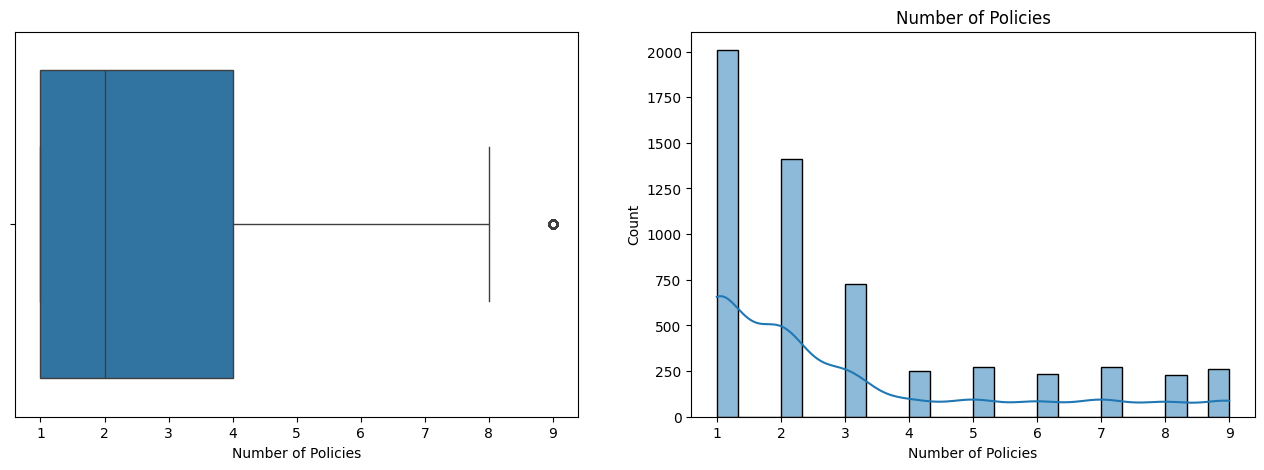

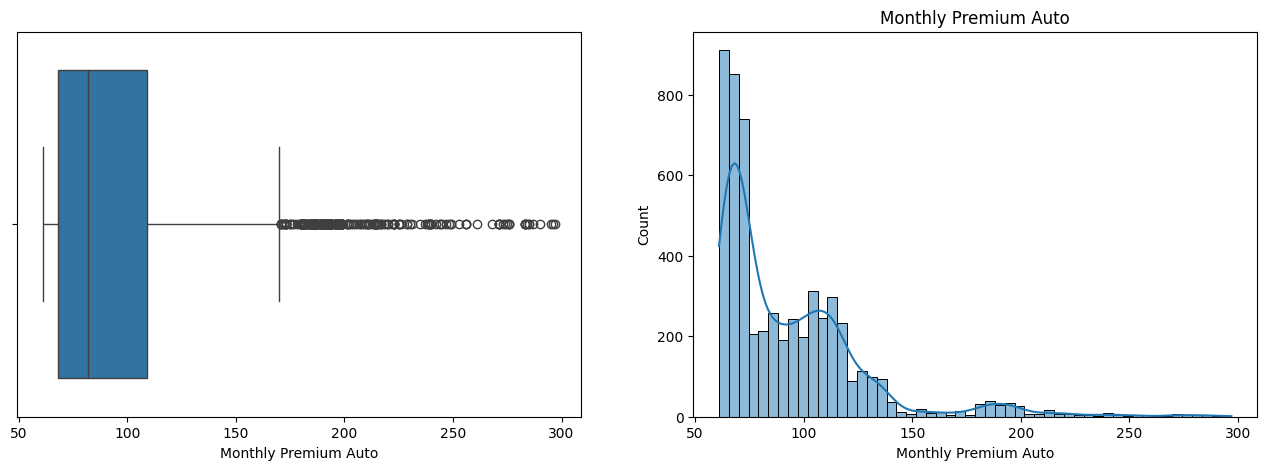

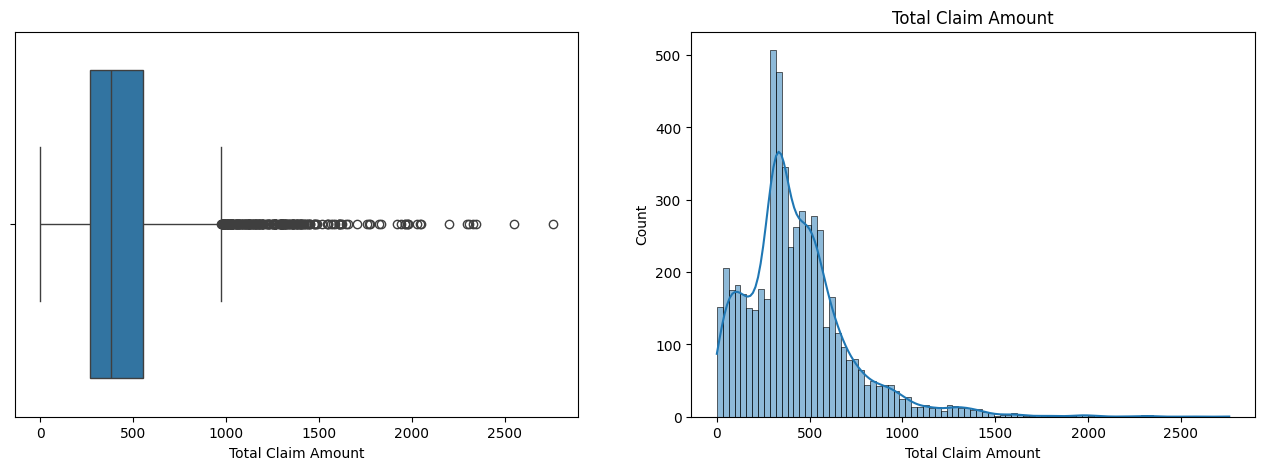

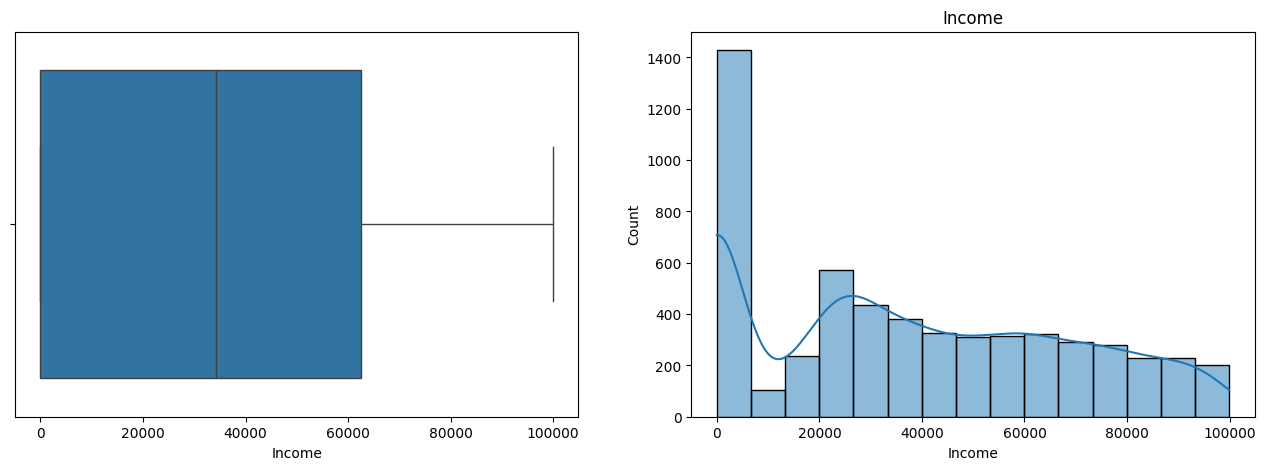

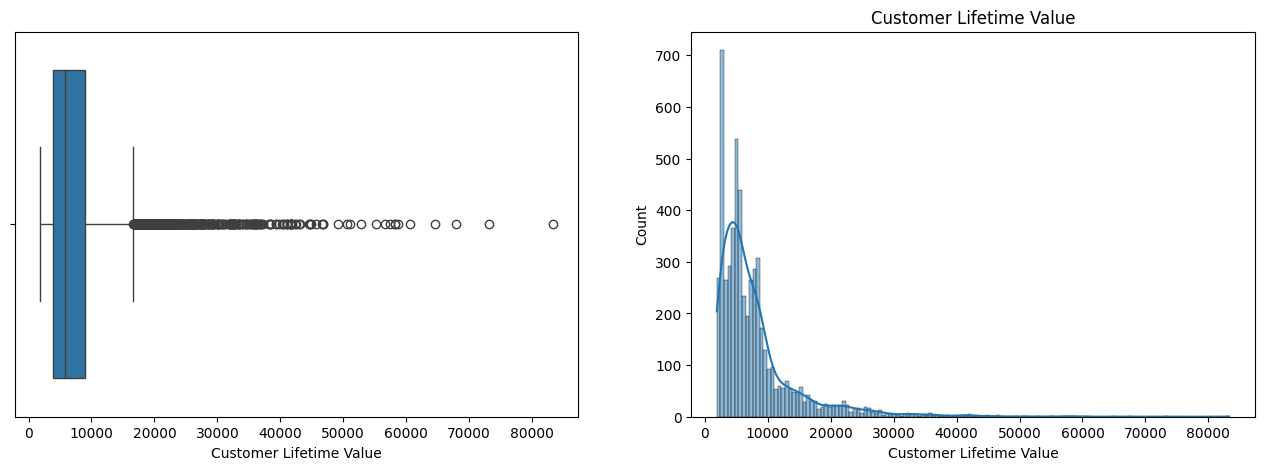

In [ ]:
for col in numerical_cols:
    plot_dist(df, col)

All numerical features are right skewed distributed, especially `Montly Premium Auto`, `Total Claim Amount`, and `Customer Lifetime Value`

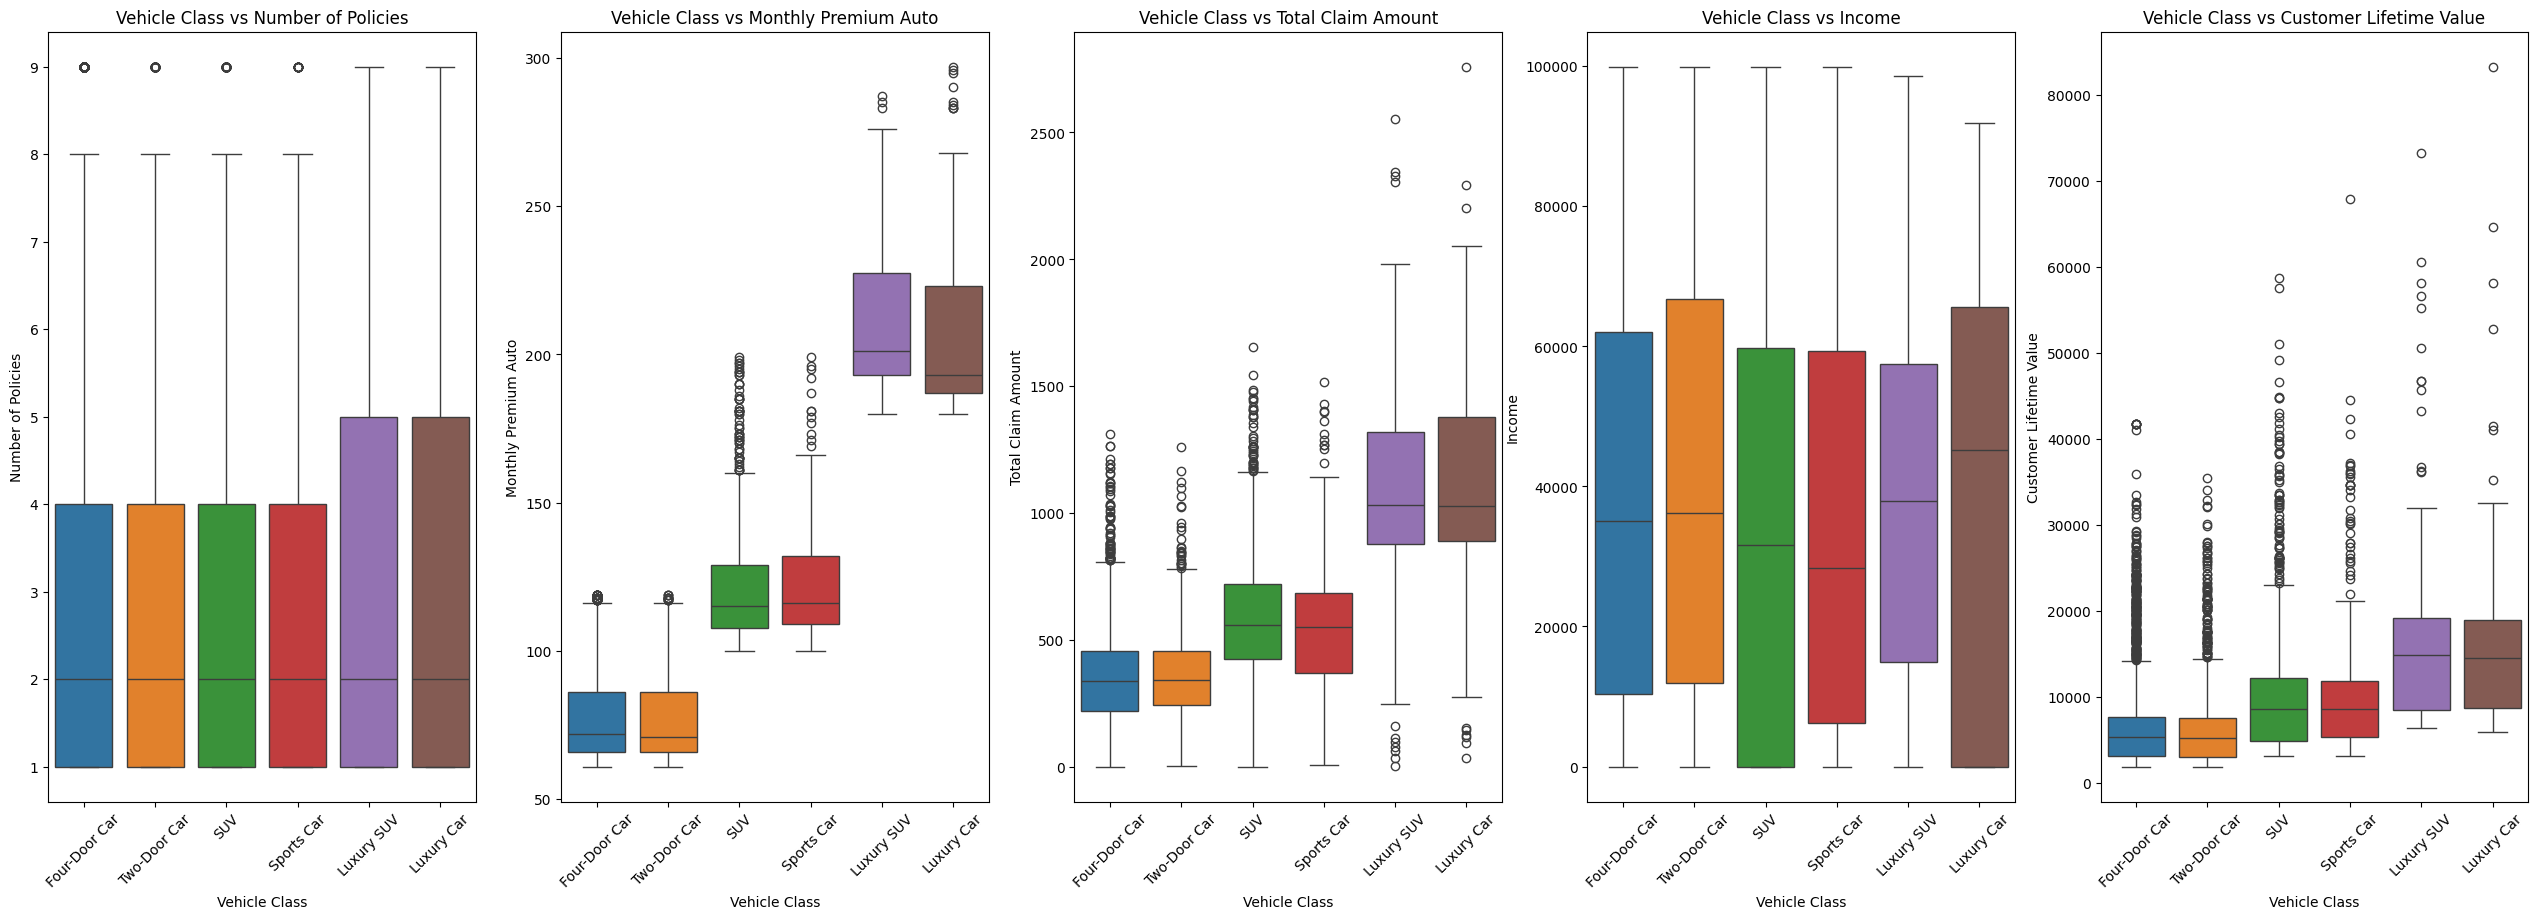

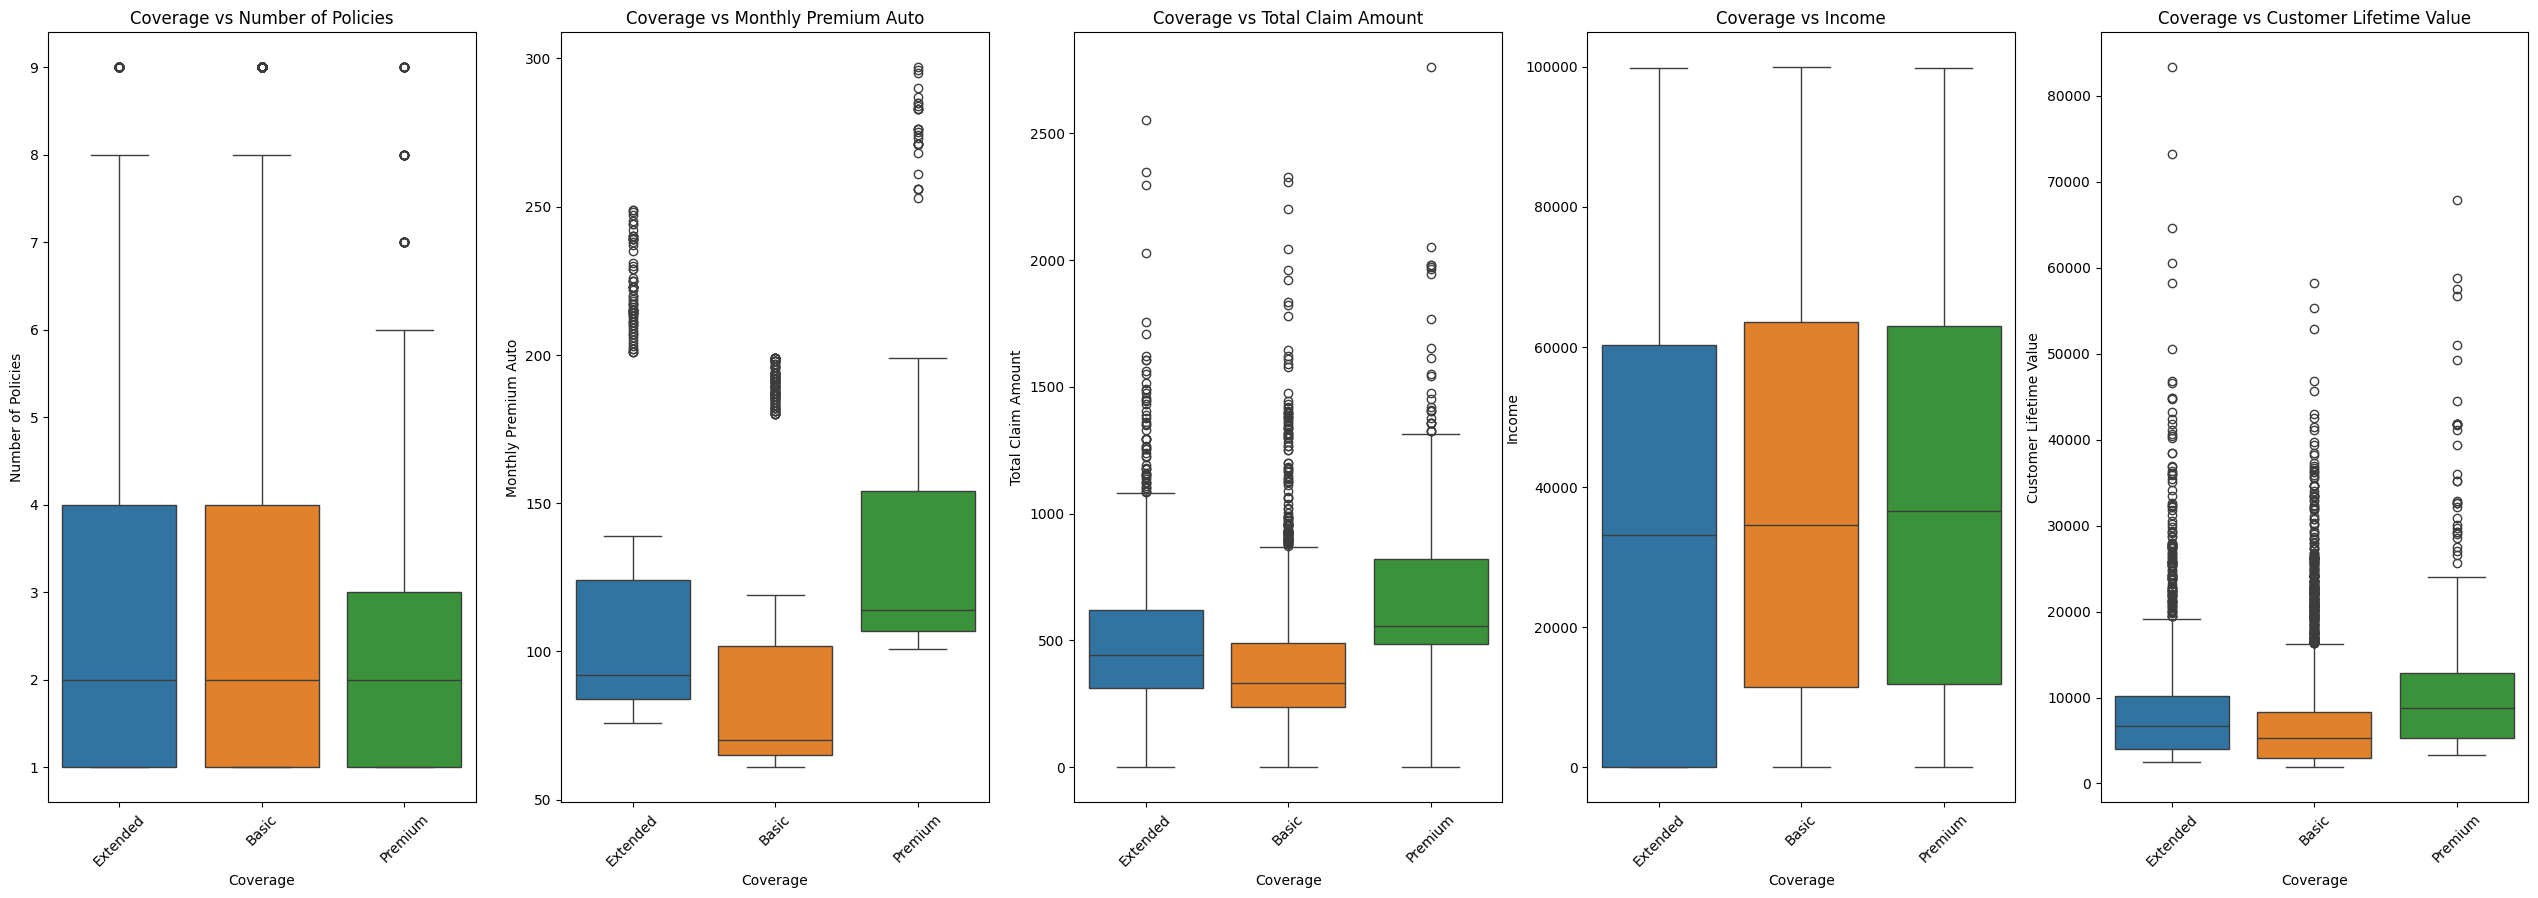

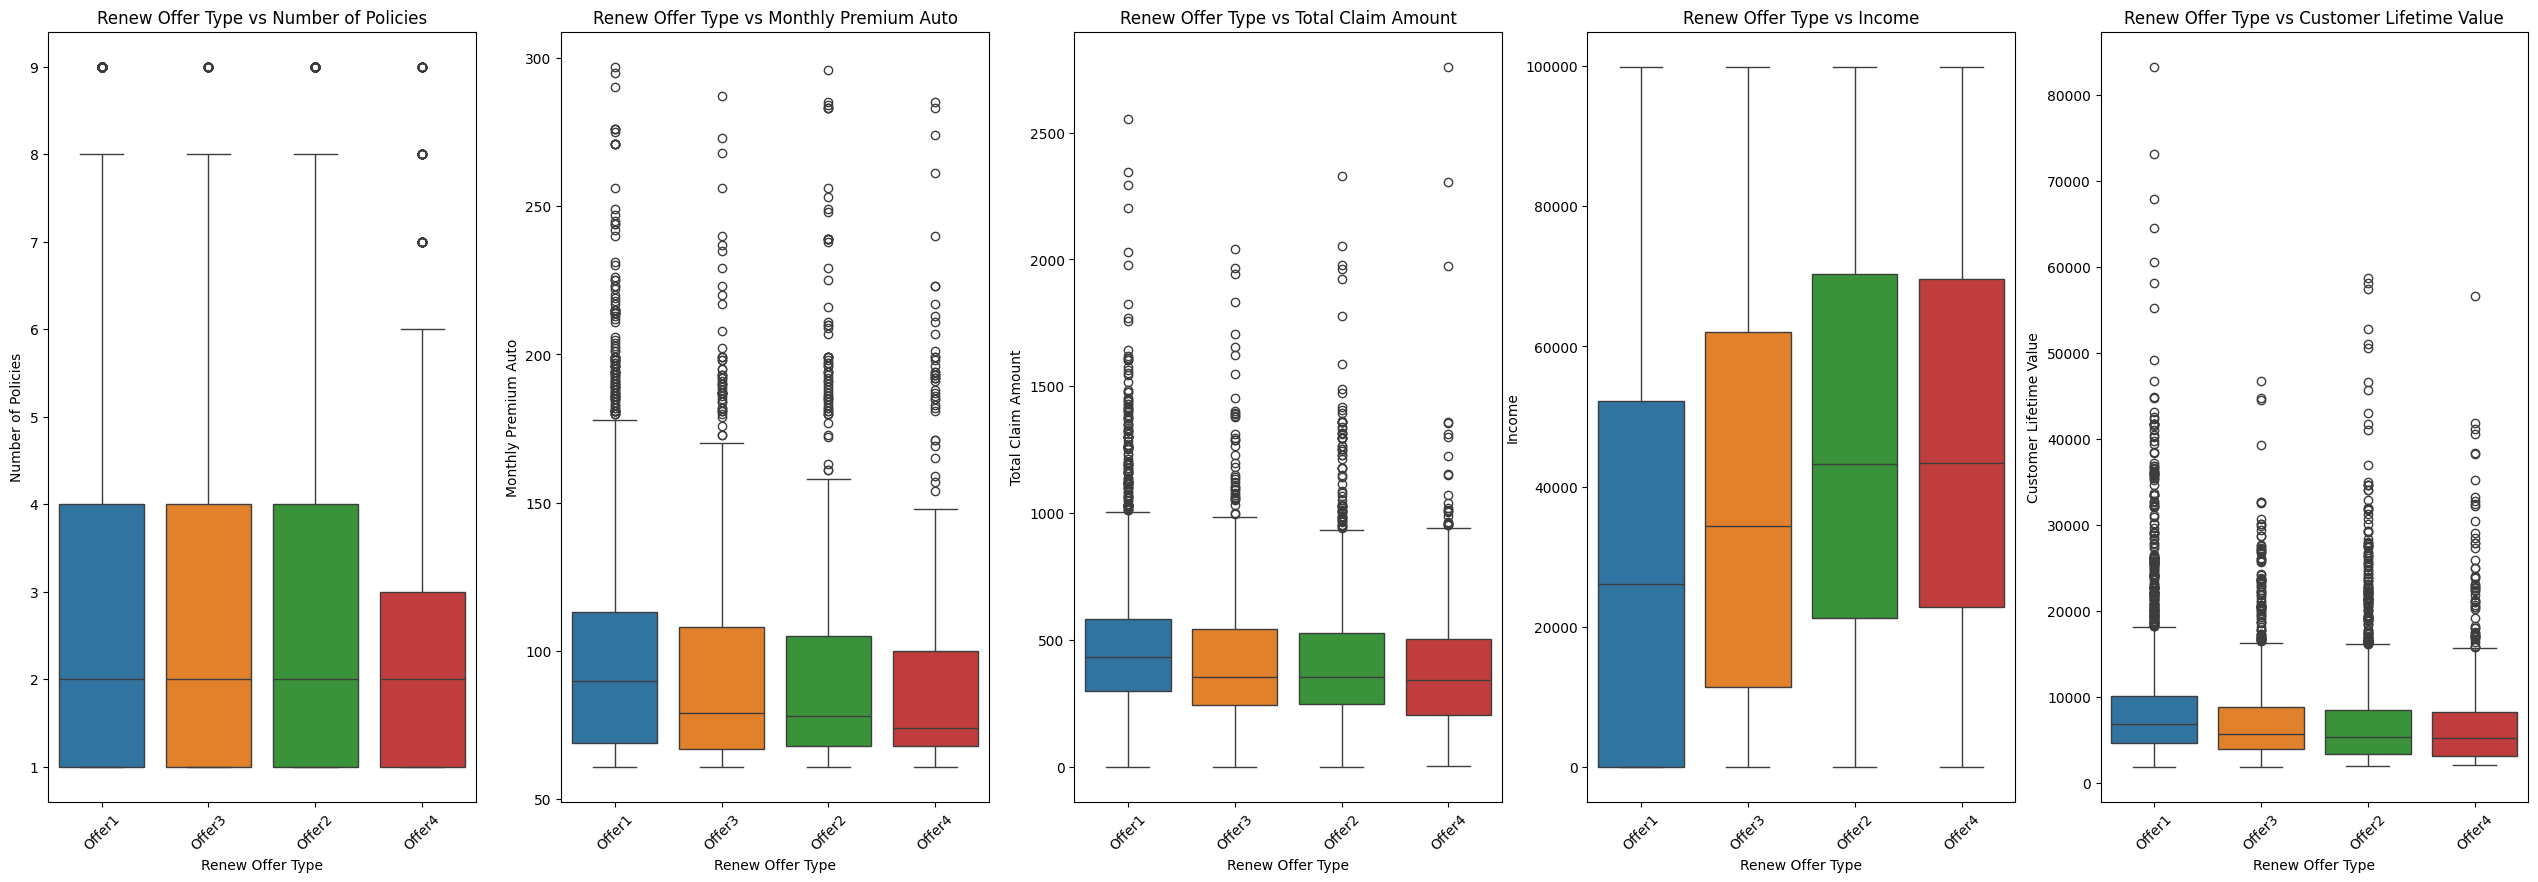

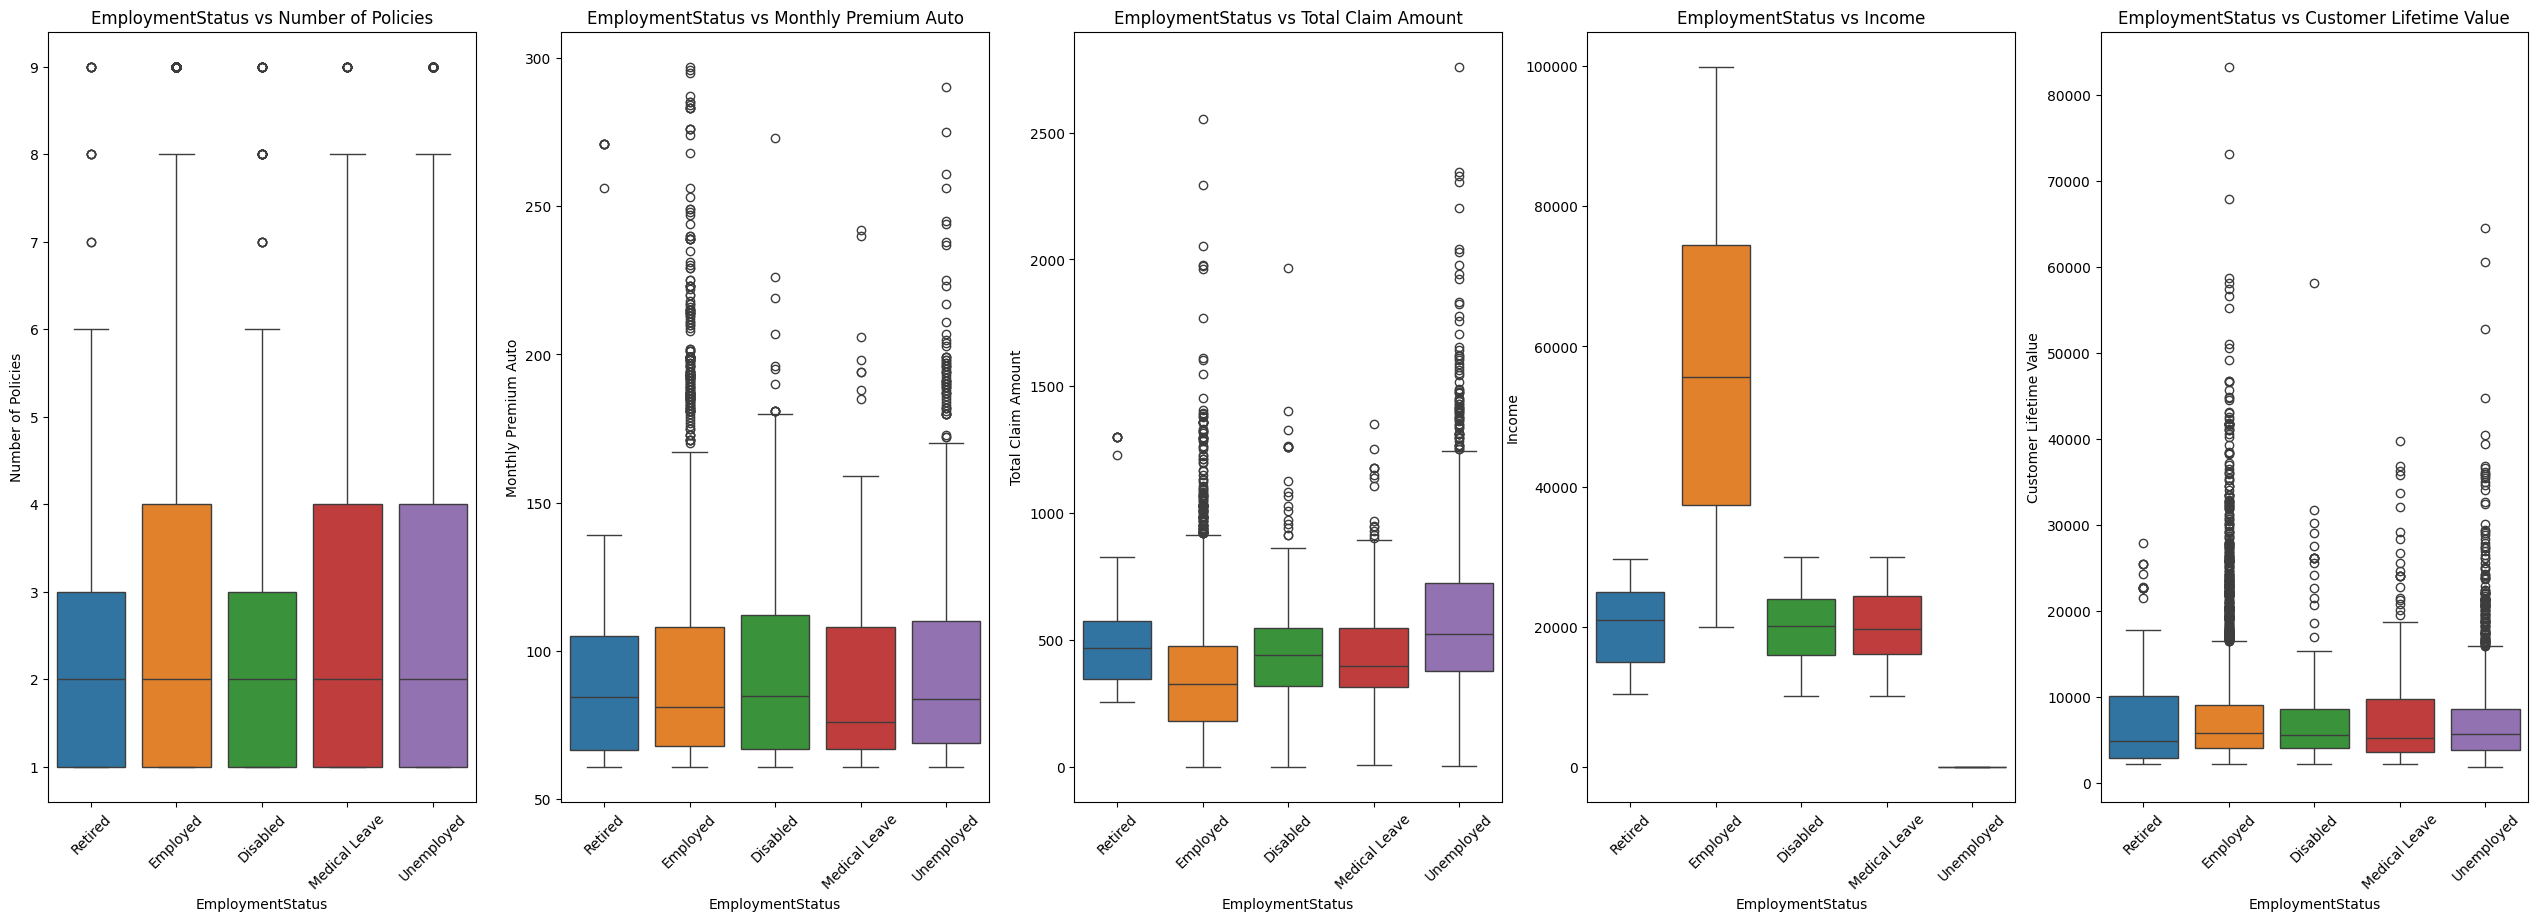

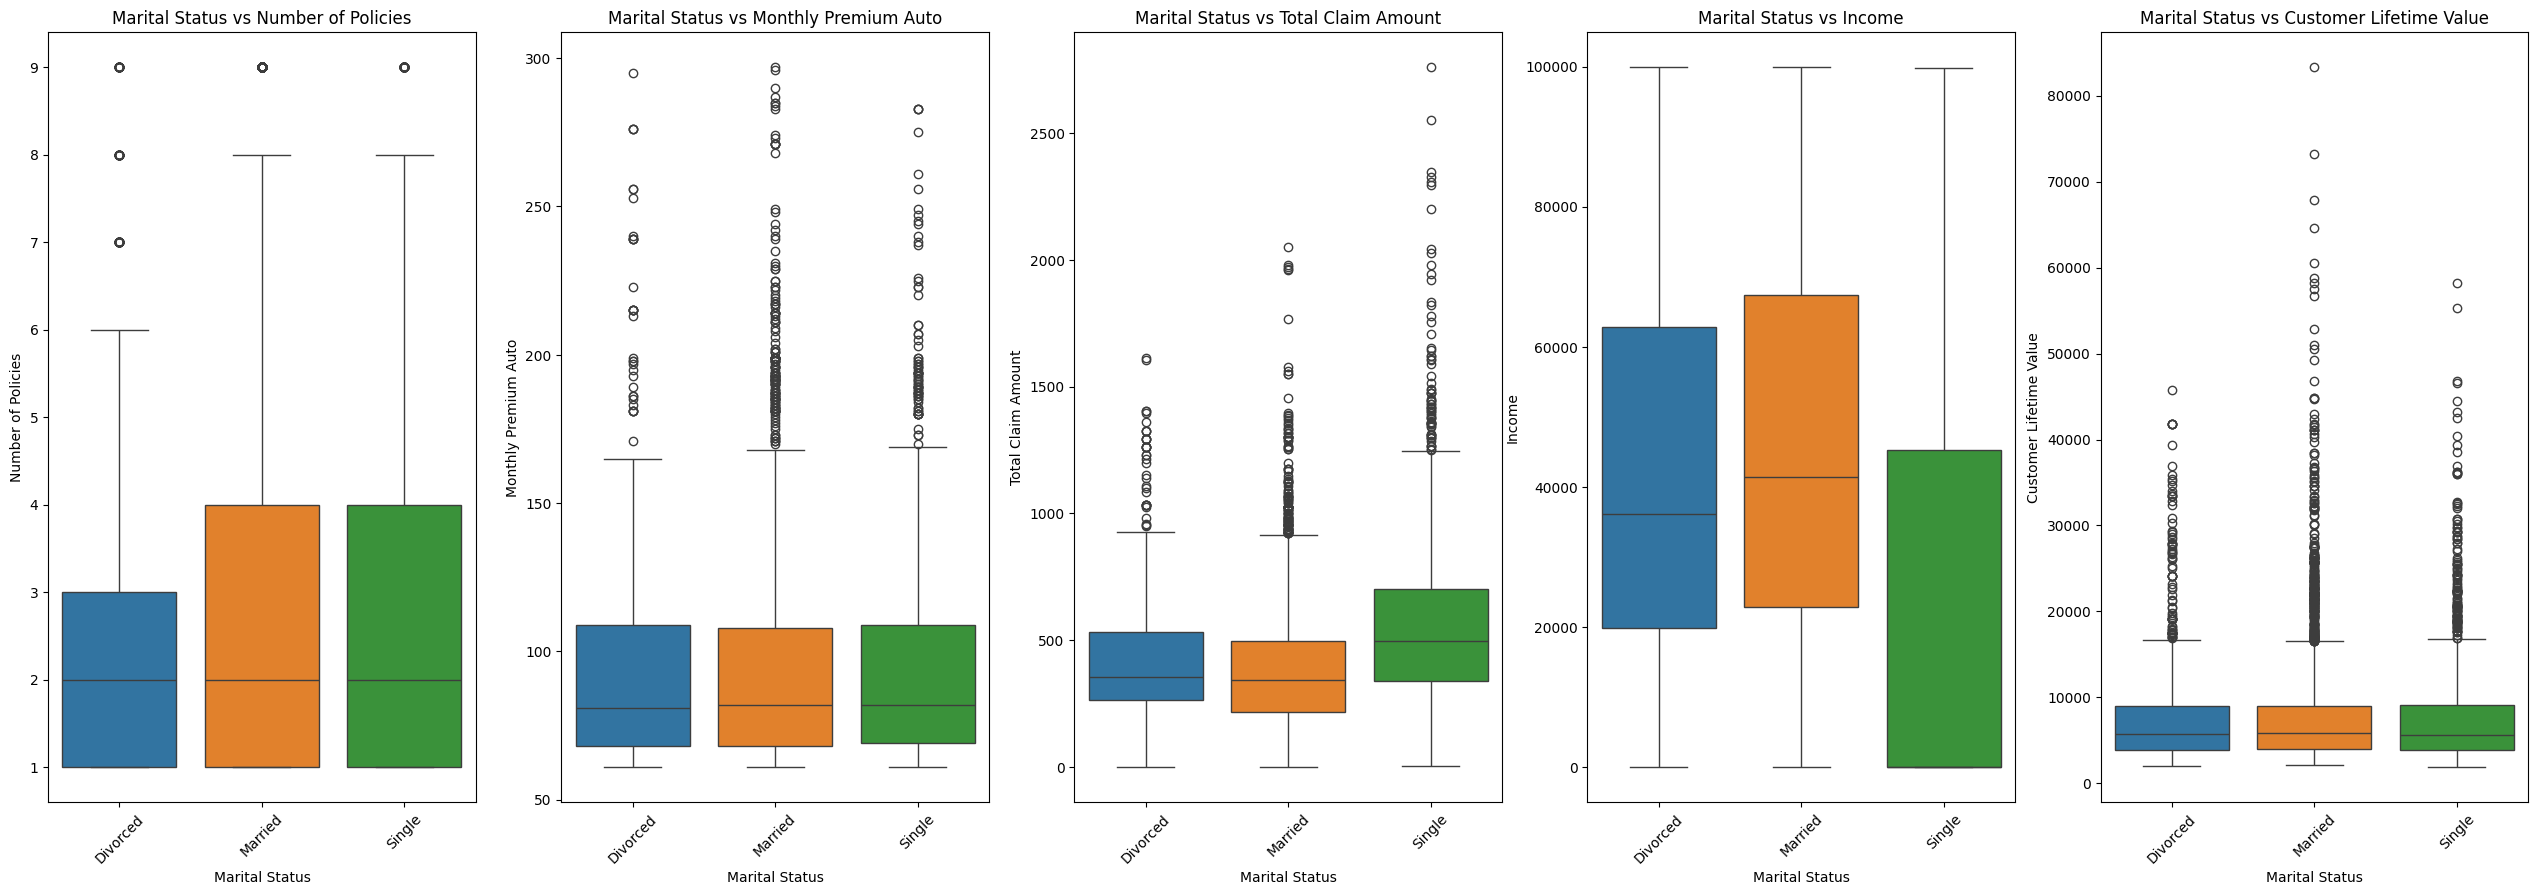

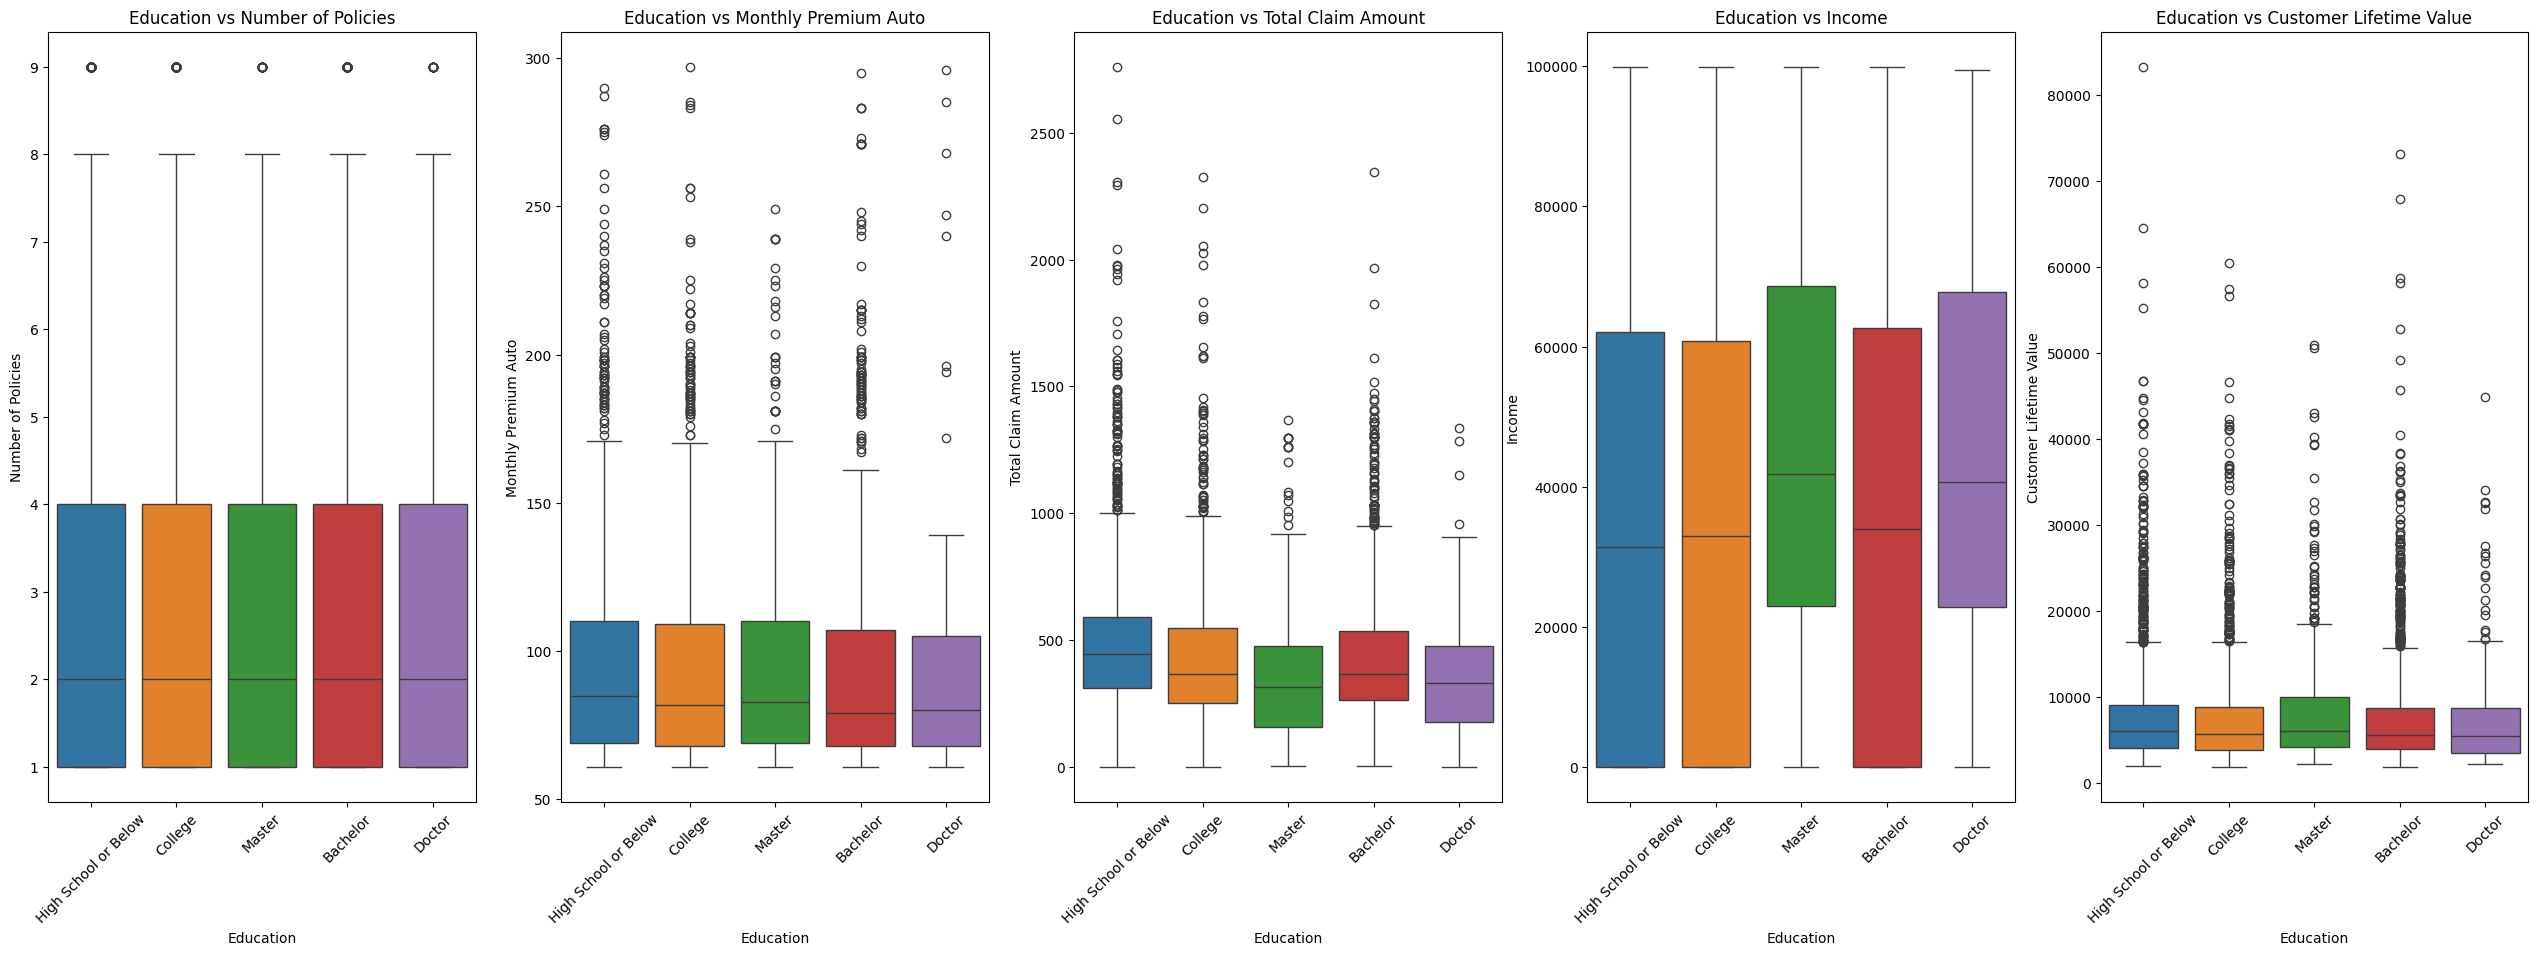

In [ ]:
for col in non_numerical_cols:
    fig, ax = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(32, 10))

    for i in range(len(numerical_cols)):
        fig.add_subplot(ax[i])
        plt.title(f'{col} vs {numerical_cols[i]}')
        sns.boxplot(data=df, x=col, y=numerical_cols[i], hue=col)
        plt.xticks(rotation=45)
    plt.show()

## 3.3. Correlations

Since the data not normal distributed, use `spearman` correlation

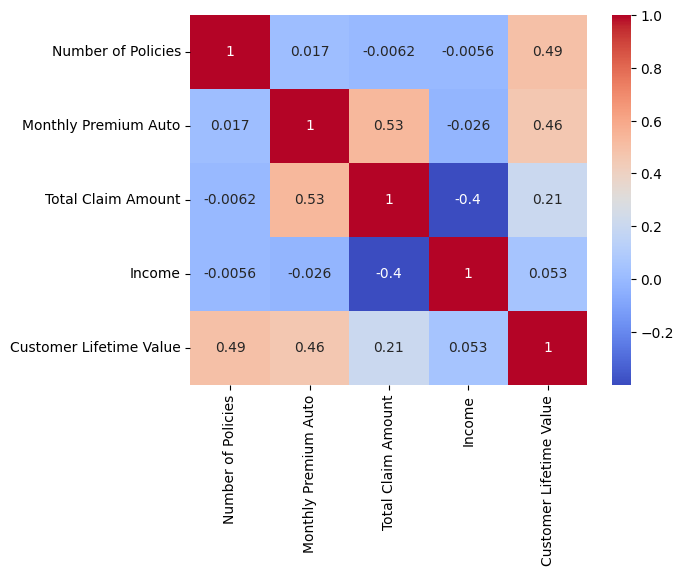

In [ ]:
sns.heatmap(
    df[numerical_cols].corr(method='spearman'),
    annot=True,
    cmap='coolwarm'
)
plt.show()

It shows a positive correlation for target `Customer Lifetime Value` with `Number of Policies (0.49)`, `Monthly Premium Auto (0.46)`, and weaker correlation `Total Claim Amount (0.21)`.

There is a positive correlation between features `Monthly Premium Auto` and `Total Claim Amount` `(0.53)` and a negative correlation between `Total Claim Amount` and `Income` `(-0.4)`.

# 4. Preprocessing

## 4.1. Train Test Split

In [ ]:
X = df.drop(columns=['Customer Lifetime Value']).copy()
y = df['Customer Lifetime Value'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=RANDOM_STATE
)

## 4.2. Encoding

Encode `Education` using `OrdinalEncoder` since order exist in here, and use `OneHotEncoder` for the other categorical features

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

In [ ]:
nominal_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']
ordinal_features = ['Education']

In [ ]:
df['Education'].unique()

array(['High School or Below', 'College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [ ]:
# Define the order for ordinal features
education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

## 4.3. Outlier Handler

In [ ]:
numerical_features = X.select_dtypes(include='number').columns.tolist()
numerical_features

['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

In [ ]:
# Cap outliers using upper bound based on train data to prevent data leakage
columns_to_cap = ['Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']
columns_to_cap_X = ['Monthly Premium Auto', 'Total Claim Amount']
upper_bounds = {}

for col in columns_to_cap:
    upper_bounds[col] = df[col].quantile(0.95)

def cap_upper_outliers(df, cols):
    for col in cols:
        df[col] = df[col].clip(upper=upper_bounds[col])
    return df

In [ ]:
upper_bounds

{'Monthly Premium Auto': np.float64(165.0),
 'Total Claim Amount': np.float64(955.2),
 'Customer Lifetime Value': np.float64(22087.123683999976)}

## 4.4. Preprocessing Pipeline

In [ ]:
# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features),
        ('ordinal', OrdinalEncoder(categories=[education_order]), ordinal_features),
        ('cap_outliers', FunctionTransformer(cap_upper_outliers, kw_args={'cols': columns_to_cap_X}), columns_to_cap_X),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
scaler_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
preprocess_pipeline = Pipeline(
    steps=[
        ('Preprocess', preprocessor),
        ('Scaler', scaler_transformer)
    ]
).set_output(transform="pandas")

In [ ]:
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)

y_train_preprocessed = cap_upper_outliers(y_train.to_frame(), ['Customer Lifetime Value'])
y_test_preprocessed = cap_upper_outliers(y_test.to_frame(), ['Customer Lifetime Value'])

In [ ]:
X_train_preprocessed.shape, y_train_preprocessed.shape, X_test_preprocessed.shape, y_test_preprocessed.shape

((4251, 26), (4251, 1), (1418, 26), (1418, 1))

# 5. Modelling

## 5.1. Best Model

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_log_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import SelectFromModel

In [ ]:
def train_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    print('-------------------------------------')
    print(f'{model_name} Model')
    print('-------------------------------------')
    print('Train Evaluation')
    print('RMSLE:', root_mean_squared_log_error(y_train, model.predict(X_train)))
    print('MAPE:', mean_absolute_percentage_error(y_train, model.predict(X_train)))
    print('MAE:', mean_absolute_error(y_train, model.predict(X_train)))
    print('MSE:', mean_squared_error(y_train, model.predict(X_train)))
    print('RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
    print('R2:', r2_score(y_train, model.predict(X_train)))
    print()
    print('Test Evaluation')
    print('RMSLE:', root_mean_squared_log_error(y_test, model.predict(X_test)))
    print('MAPE:', mean_absolute_percentage_error(y_test, model.predict(X_test)))
    print('MAE:', mean_absolute_error(y_test, model.predict(X_test)))
    print('MSE:', mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))
    print('R2:', r2_score(y_test, model.predict(X_test)))
    return model

In [ ]:
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    print('-------------------------------------')
    print(f'{model_name} Model')
    print('-------------------------------------')
    print('Train Evaluation')
    print('RMSLE:', root_mean_squared_log_error(y_train, model.predict(X_train)))
    print('MAPE:', mean_absolute_percentage_error(y_train, model.predict(X_train)))
    print('MAE:', mean_absolute_error(y_train, model.predict(X_train)))
    print('MSE:', mean_squared_error(y_train, model.predict(X_train)))
    print('RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
    print('R2:', r2_score(y_train, model.predict(X_train)))
    print()
    print('Test Evaluation')
    print('RMSLE:', root_mean_squared_log_error(y_test, model.predict(X_test)))
    print('MAPE:', mean_absolute_percentage_error(y_test, model.predict(X_test)))
    print('MAE:', mean_absolute_error(y_test, model.predict(X_test)))
    print('MSE:', mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))
    print('R2:', r2_score(y_test, model.predict(X_test)))

In [ ]:
def get_best_model(model_name, model, X_train, y_train, X_test, y_test, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_log_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f'Best parameters for {model_name}: {grid_search.best_params_}; MSE: {abs(grid_search.best_score_)}')
    train_evaluate_model(model_name, best_model, X_train, y_train, X_test, y_test)
    return best_model

In [ ]:
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Lasso Regression', Lasso(random_state=RANDOM_STATE), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    ('Ridge Regression', Ridge(random_state=RANDOM_STATE), {'alpha': [0.01, 0.1, 1, 10, 100]}),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=RANDOM_STATE), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    ('Random Forest Regressor', RandomForestRegressor(random_state=RANDOM_STATE), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}),
    ('MLP Regressor', MLPRegressor(random_state=RANDOM_STATE), {'hidden_layer_sizes': [(64,), (128,), (64, 64)],
                      'alpha': [0.0001, 0.001, 0.01]}),
    ('XGBoost Regressor', XGBRegressor(random_state=RANDOM_STATE), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    })
]

In [ ]:
best_models = []
for model_name, model, param_grid in models:
    best_model = get_best_model(model_name, model, X_train_preprocessed, y_train_preprocessed, X_test_preprocessed, y_test_preprocessed, param_grid)
    best_models.append((model_name, best_model))
    print()

Best parameters for Linear Regression: {}; MSE: 0.5650654819350349
-------------------------------------
Linear Regression Model
-------------------------------------
Train Evaluation
RMSLE: 0.562665113557096
MAPE: 0.5445937623269347
MAE: 3317.551004585221
MSE: 22155771.786015242
RMSE: 4706.991797954957
R2: 0.18276468402814106

Test Evaluation
RMSLE: 0.5718497040534708
MAPE: 0.5591071932149662
MAE: 3418.3605297622503
MSE: 23038892.466297746
RMSE: 4799.884630519545
R2: 0.16843703341945349



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+10, tolerance: 7.484e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.293e+08, tolerance: 7.740e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.150e+10, tolerance: 7.825e

Best parameters for Lasso Regression: {'alpha': 10}; MSE: 0.5648745008162277
-------------------------------------
Lasso Regression Model
-------------------------------------
Train Evaluation
RMSLE: 0.562948044907864
MAPE: 0.5454286262826203
MAE: 3323.7655121573634
MSE: 22192458.12839821
RMSE: 4710.88719121974
R2: 0.18141147571300043

Test Evaluation
RMSLE: 0.5714136863296359
MAPE: 0.5584943976821143
MAE: 3419.4351926498857
MSE: 23043632.793000884
RMSE: 4800.378401022245
R2: 0.1682659366472632

Best parameters for Ridge Regression: {'alpha': 10}; MSE: 0.5649493585070454
-------------------------------------
Ridge Regression Model
-------------------------------------
Train Evaluation
RMSLE: 0.5626336605060808
MAPE: 0.5447184086055928
MAE: 3318.89261106541
MSE: 22159342.256132968
RMSE: 4707.371055709648
R2: 0.18263298406738104

Test Evaluation
RMSLE: 0.5717529321804274
MAPE: 0.559116128159606
MAE: 3419.5086737453357
MSE: 23035964.37655557
RMSE: 4799.579604148218
R2: 0.16854271953244615

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}; MSE: 0.17554491759538013


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-------------------------------------
Random Forest Regressor Model
-------------------------------------
Train Evaluation
RMSLE: 0.1252059781501815
MAPE: 0.06527849194998887
MAE: 754.1194438660785
MSE: 2802247.36317941
RMSE: 1673.99144656698
R2: 0.8966366176995583

Test Evaluation
RMSLE: 0.16924313458841148
MAPE: 0.09034604212720526
MAE: 1059.2916784216607
MSE: 5333393.250381451
RMSE: 2309.4140491435164
R2: 0.8074971563969213



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conver

Best parameters for MLP Regressor: {'alpha': 0.0001, 'hidden_layer_sizes': (64, 64)}; MSE: 0.5638591450106715


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-------------------------------------
MLP Regressor Model
-------------------------------------
Train Evaluation
RMSLE: 0.5626357766042832
MAPE: 0.5449688931019706
MAE: 3321.1917124309066
MSE: 22165114.95117556
RMSE: 4707.984170658984
R2: 0.18242005308475928

Test Evaluation
RMSLE: 0.5718135303622598
MAPE: 0.5594556262806161
MAE: 3422.464689709983
MSE: 23045689.588750456
RMSE: 4800.5926289105655
R2: 0.16819169891306374

Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}; MSE: 0.1818934679031372
-------------------------------------
XGBoost Regressor Model
-------------------------------------
Train Evaluation
RMSLE: 0.12762519717216492
MAPE: 0.06934557110071182
MAE: 767.3727416992188
MSE: 2870584.25
RMSE: 1694.2799072265625
R2: 0.8941159248352051

Test Evaluation
RMSLE: 0.16960908472537994
MAPE: 0.09218606352806091
MAE: 1060.5576171875
MSE: 5295603.5
RMSE: 2301.2177734375
R2: 0.8088611364364624



In [ ]:
for model_name, model in best_models:
    evaluate_model(model_name, model, X_train_preprocessed, y_train_preprocessed, X_test_preprocessed, y_test_preprocessed)
    print()

-------------------------------------
Linear Regression Model
-------------------------------------
Train Evaluation
RMSLE: 0.562665113557096
MAPE: 0.5445937623269347
MAE: 3317.551004585221
MSE: 22155771.786015242
RMSE: 4706.991797954957
R2: 0.18276468402814106

Test Evaluation
RMSLE: 0.5718497040534708
MAPE: 0.5591071932149662
MAE: 3418.3605297622503
MSE: 23038892.466297746
RMSE: 4799.884630519545
R2: 0.16843703341945349

-------------------------------------
Lasso Regression Model
-------------------------------------
Train Evaluation
RMSLE: 0.562948044907864
MAPE: 0.5454286262826203
MAE: 3323.7655121573634
MSE: 22192458.12839821
RMSE: 4710.88719121974
R2: 0.18141147571300043

Test Evaluation
RMSLE: 0.5714136863296359
MAPE: 0.5584943976821143
MAE: 3419.4351926498857
MSE: 23043632.793000884
RMSE: 4800.378401022245
R2: 0.1682659366472632

-------------------------------------
Ridge Regression Model
-------------------------------------
Train Evaluation
RMSLE: 0.5626336605060808
MAPE: 0

In [ ]:
def find_best_model(best_models):
    best_rmsle = float('inf')
    best_model_name = None
    best_model = None
    for model_name, model in best_models:
        rmsle = root_mean_squared_log_error(y_test_preprocessed, model.predict(X_test_preprocessed))
        if rmsle < best_rmsle:
            best_rmsle = rmsle
            best_model_name = model_name
            best_model = model
    return best_model_name, best_model, best_rmsle

In [ ]:
best_model_name, best_model, best_rmsle = find_best_model(best_models)
print(f'Best model: {best_model_name} with RMSLE: {best_rmsle}')

Best model: Random Forest Regressor with RMSLE: 0.16924313458841148


### Save Best Model (Optional)

In [ ]:
# import pickle
# with open('best_model.pkl', 'wb') as f:
#     pickle.dump(model, f)

### Load Model (Optional)

In [ ]:
# import pickle
# with open("best_model.pkl", "rb") as f:
#     best_model = pickle.load(f)
# best_model_name = 'Random Forest Regressor'

## 5.2. Feature Importances

In [ ]:
feature_importances_df = pd.DataFrame(best_model.feature_importances_,index=X_train_preprocessed.columns,columns=['Score']).sort_values("Score",ascending=False)

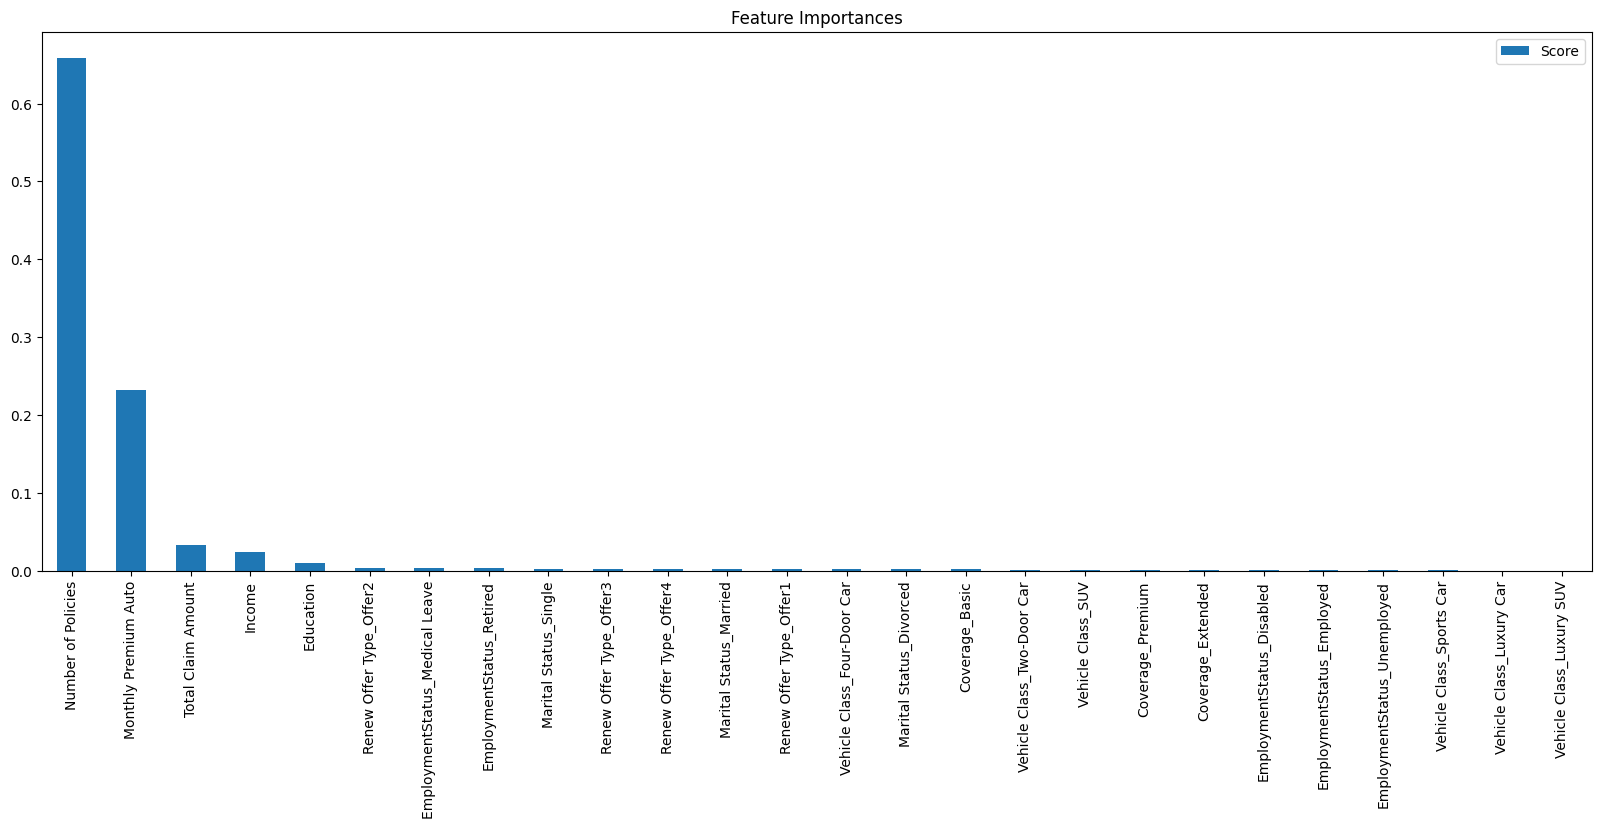

In [ ]:
feature_importances_df.plot(kind='bar',figsize=(20,7), title='Feature Importances')
plt.show()

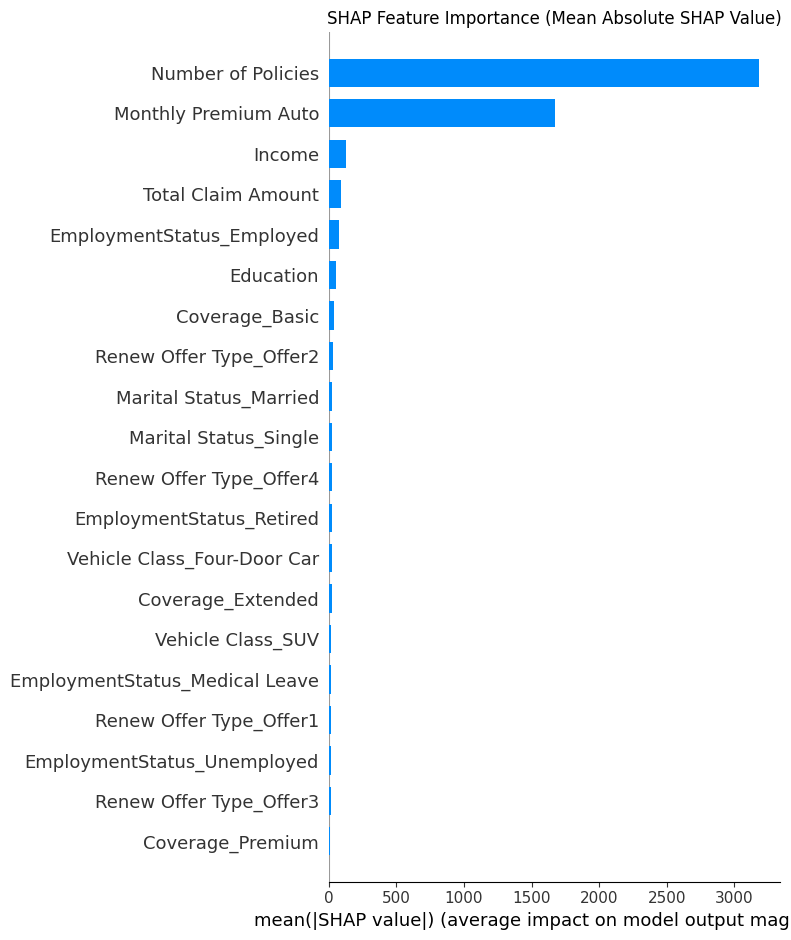

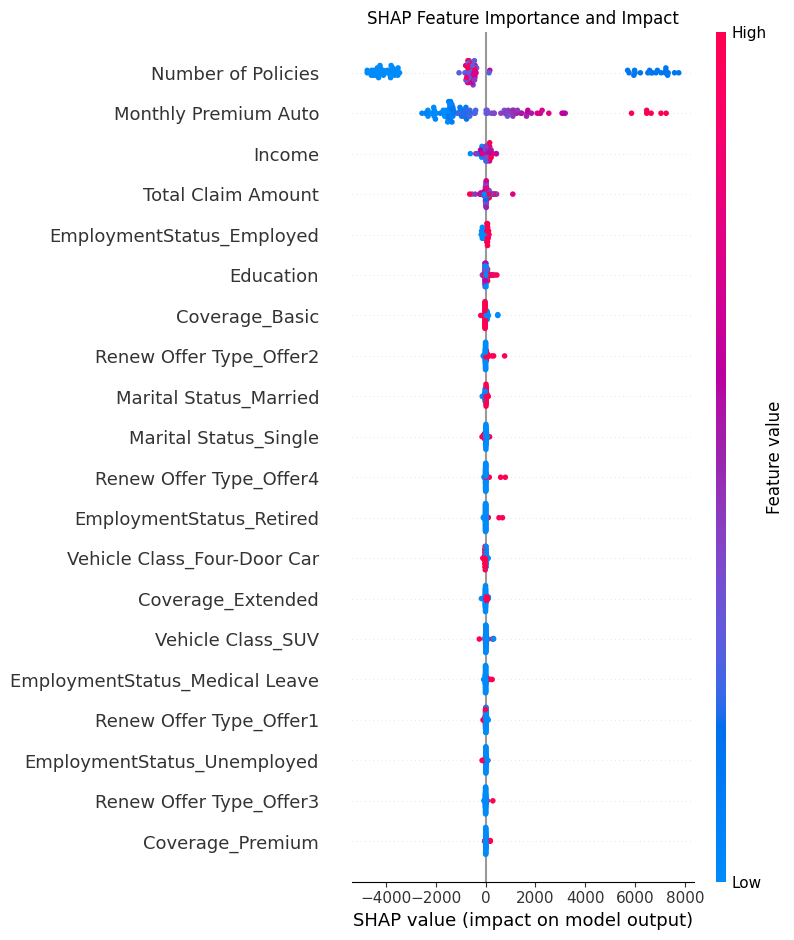

In [ ]:
import shap

feature_names = X_train_preprocessed.columns.tolist()
X_train_for_shap = X_train_preprocessed.copy()
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train_for_shap.sample(n=100, random_state=RANDOM_STATE))

# Summarize the feature importance based on SHAP values
# Plot summary plot
plt.title("SHAP Feature Importance (Mean Absolute SHAP Value)")
shap.summary_plot(shap_values, X_train_for_shap.sample(n=100, random_state=RANDOM_STATE), feature_names=feature_names, plot_type="bar")
plt.show()

# Plot summary plot (dots)
plt.title("SHAP Feature Importance and Impact")
shap.summary_plot(shap_values, X_train_for_shap.sample(n=100, random_state=RANDOM_STATE), feature_names=feature_names)
plt.show()

# Example of single prediction explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_for_shap.iloc[0,:])

`Number of Policies` and `Monthly Premium Auto` are the most important features, followed by `Income` and `Total Claim Amount`. The bigger `Monthly Premium Auto` tends to have bigger `Customer Lifetime Value`

## 5.3. Feature Selections

In [ ]:
sfm = SelectFromModel(estimator=best_model)

X_train_selected = sfm.fit_transform(X_train_preprocessed, y_train)
X_test_selected = sfm.transform(X_test_preprocessed)

print("Shape of training data after feature selection:", X_train_selected.shape)
print("Shape of testing data after feature selection:", X_test_selected.shape)

Shape of training data after feature selection: (4251, 4)
Shape of testing data after feature selection: (1418, 4)


In [ ]:
selected_feature_mask = sfm.get_support()
selected_feature_names = X_train_preprocessed.columns[selected_feature_mask]

print("Number of selected features:", len(selected_feature_names))

print("\nSelected feature names:")
print(selected_feature_names)

Number of selected features: 4

Selected feature names:
Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income'],
      dtype='object')


In [ ]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2042,
 'verbose': 0,
 'warm_start': False}

In [ ]:
final_regression_model = ('Random Forest Regressor Selected Features', best_model.__class__(**best_model.get_params()))
train_evaluate_model(
    final_regression_model[0],
    final_regression_model[1],
    X_train_selected,
    y_train_preprocessed,
    X_test_selected,
    y_test_preprocessed
)
train_evaluate_model(
    best_model_name,
    best_model,
    X_train_preprocessed,
    y_train_preprocessed,
    X_test_preprocessed,
    y_test_preprocessed
)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-------------------------------------
Random Forest Regressor Selected Features Model
-------------------------------------
Train Evaluation
RMSLE: 0.13112919712131837
MAPE: 0.07150980982661047
MAE: 815.7400741675667
MSE: 3089321.814417873
RMSE: 1757.6466693900322
R2: 0.8860476216523343

Test Evaluation
RMSLE: 0.1741959188459716
MAPE: 0.09654073878535926
MAE: 1108.1388044856171
MSE: 5565366.33841768
RMSE: 2359.1028672818998
R2: 0.7991243481320952


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


-------------------------------------
Random Forest Regressor Model
-------------------------------------
Train Evaluation
RMSLE: 0.1252059781501815
MAPE: 0.06527849194998887
MAE: 754.1194438660785
MSE: 2802247.36317941
RMSE: 1673.99144656698
R2: 0.8966366176995583

Test Evaluation
RMSLE: 0.16924313458841148
MAPE: 0.09034604212720526
MAE: 1059.2916784216607
MSE: 5333393.250381451
RMSE: 2309.4140491435164
R2: 0.8074971563969213


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=2042)

# 6. Prediction Analysis

## 6.1. Residual Analysis

In [ ]:
preprocessed_test_df = X_test_preprocessed.copy()
scaled_features = preprocess_pipeline.named_steps['Scaler'].named_transformers_['scaler'].get_feature_names_out().tolist()
preprocessed_test_df[scaled_features] = preprocess_pipeline.named_steps['Scaler'].named_transformers_['scaler'].inverse_transform(preprocessed_test_df[scaled_features])
preprocessed_test_df.shape

(1418, 26)

In [ ]:
preprocessed_test_df.head()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,...,Renew Offer Type_Offer4,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education
4460,2.0,82.0,590.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2497,3.0,68.0,29.209521,61546.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4216,1.0,104.0,748.800000,24123.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1959,2.0,83.0,81.599332,59325.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4740,1.0,61.0,38.379869,40658.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [ ]:
preprocessed_test_df['Customer Lifetime Value'] = y_test_preprocessed
preprocessed_test_df['Prediction'] = best_model.predict(X_test_preprocessed)
preprocessed_test_df['Residual'] = preprocessed_test_df['Customer Lifetime Value'] - preprocessed_test_df['Prediction']
preprocessed_test_df['Residual Percentage'] = abs(preprocessed_test_df['Customer Lifetime Value'] - preprocessed_test_df['Prediction']) / preprocessed_test_df['Customer Lifetime Value']

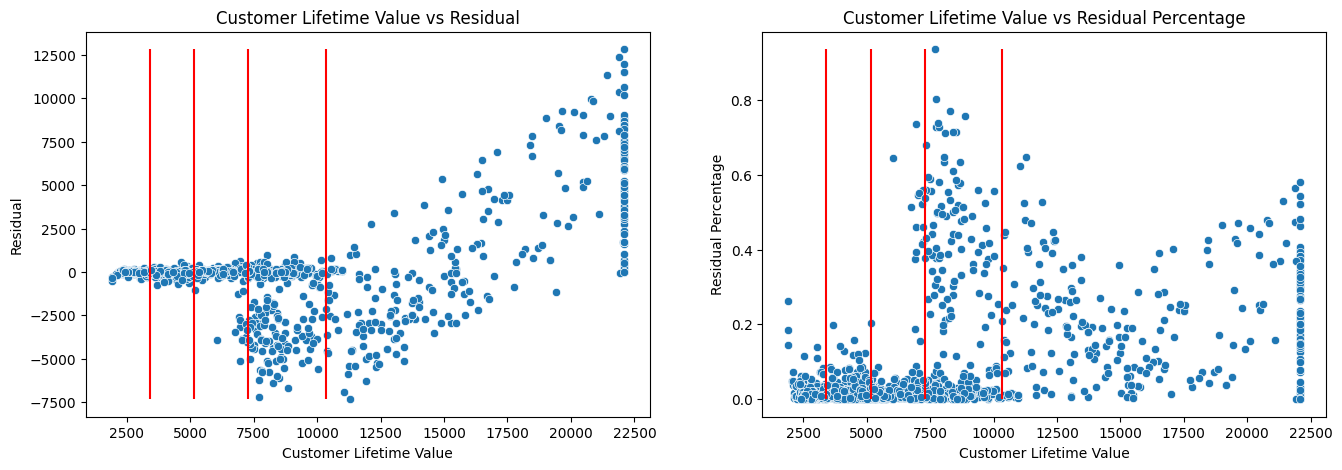

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
fig.add_subplot(ax[0])
plt.title('Customer Lifetime Value vs Residual')
sns.scatterplot(
    data=preprocessed_test_df,
    x='Customer Lifetime Value',
    y='Residual'
)
plt.vlines(
    x=[y_train.quantile(0.2), y_train.quantile(0.4), y_train.quantile(0.6), y_train.quantile(0.8)],
    ymin=preprocessed_test_df['Residual'].min(),
    ymax=preprocessed_test_df['Residual'].max(),
    colors='red'
)

fig.add_subplot(ax[1])
plt.title('Customer Lifetime Value vs Residual Percentage')
sns.scatterplot(
    data=preprocessed_test_df,
    x='Customer Lifetime Value',
    y='Residual Percentage'
)
plt.vlines(
    x=[y_train.quantile(0.2), y_train.quantile(0.4), y_train.quantile(0.6), y_train.quantile(0.8)],
    ymin=0,
    ymax=preprocessed_test_df['Residual Percentage'].max(),
    colors='red'
)
plt.show()

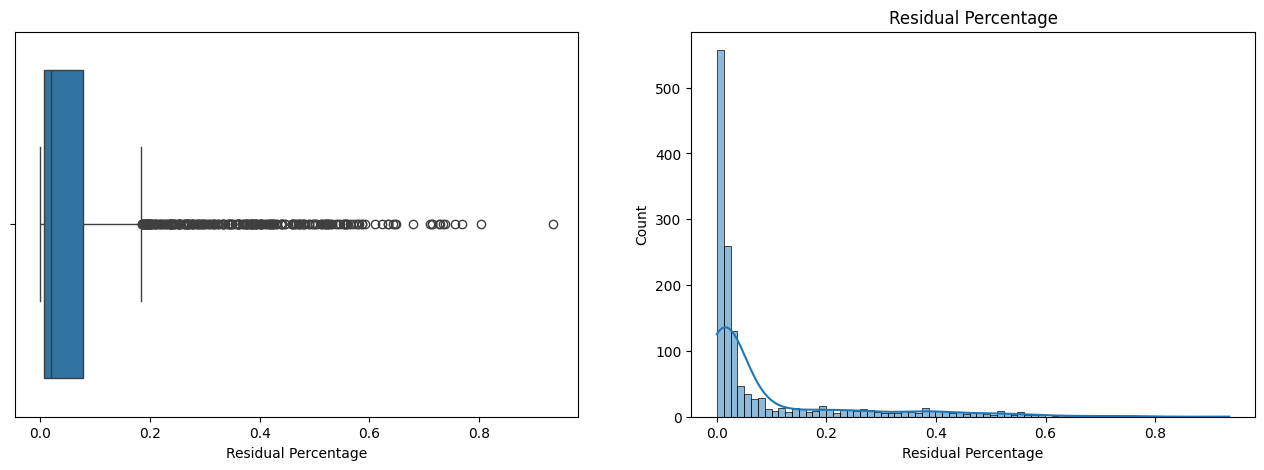

In [ ]:
plot_dist(preprocessed_test_df, 'Residual Percentage')

In [ ]:
preprocessed_test_df['Residual Percentage'].describe()

,Residual Percentage
count,1418.000000
mean,0.090346
std,0.152934
min,0.000007
25%,0.007310
50%,0.018825
75%,0.077839
max,0.935397


In [ ]:
upper_bound_residual = preprocessed_test_df['Residual Percentage'].quantile(0.75) + 1.5 * (preprocessed_test_df['Residual Percentage'].quantile(0.75) - preprocessed_test_df['Residual Percentage'].quantile(0.25))
lower_residual_percentage_df = preprocessed_test_df[preprocessed_test_df['Residual Percentage'] <= upper_bound_residual]
higher_residual_percentage_df = preprocessed_test_df[preprocessed_test_df['Residual Percentage'] > upper_bound_residual]

In [ ]:
lower_residual_percentage_df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,...,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education,Customer Lifetime Value,Prediction,Residual,Residual Percentage
count,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,...,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000
mean,3.154577,92.559585,411.540396,39217.113126,0.495682,0.024180,0.028497,0.196028,0.055268,0.200345,...,0.034542,0.223661,0.175302,0.573402,0.251295,1.348014,6341.523577,6308.483982,33.039595,0.025852
std,2.579309,29.336650,242.818404,29962.342795,0.500197,0.153673,0.166461,0.397161,0.228601,0.400432,...,0.182696,0.416878,0.380390,0.494796,0.433945,1.087666,4238.323994,4110.004762,561.163397,0.034143
min,1.000000,61.000000,2.964380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1918.119700,2139.490053,-2519.285455,0.000007
25%,1.000000,69.000000,245.139976,14263.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3364.329513,3381.979849,-49.877590,0.005822
50%,2.000000,83.000000,383.549035,37264.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5096.673223,5117.447313,12.481589,0.013096
75%,5.000000,110.000000,553.944299,63252.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,7805.312870,7885.255175,71.879960,0.029002
max,9.000000,165.000000,955.200000,99874.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,22087.123684,22086.977450,3775.693144,0.183520


In [ ]:
higher_residual_percentage_df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,...,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education,Customer Lifetime Value,Prediction,Residual,Residual Percentage
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.0,260.0,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,2.007692,84.750000,377.190048,38044.319231,0.538462,0.0,0.0,0.161538,0.050000,0.250000,...,0.026923,0.223077,0.134615,0.630769,0.234615,1.192308,13239.041874,13316.381221,-77.339347,0.377591
std,0.340251,21.335955,218.081003,29211.076390,0.499480,0.0,0.0,0.368737,0.218365,0.433848,...,0.162171,0.417112,0.341971,0.483527,0.424575,1.029272,5695.344544,2785.719574,5270.881634,0.146042
min,1.000000,61.000000,0.517753,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1898.007675,2249.450404,-7324.525383,0.185164
25%,2.000000,68.000000,229.780931,15842.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8277.339211,11169.738263,-3945.493267,0.254482
50%,2.000000,77.000000,355.200000,32772.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,11680.677515,13342.774401,-2706.984842,0.361559
75%,2.000000,100.000000,491.568002,60995.500000,1.000000,0.0,0.0,0.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,19488.374313,15386.431185,4646.802678,0.471006
max,7.000000,165.000000,955.200000,99875.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,22087.123684,18618.507303,12817.322154,0.935397


Model tends to be more dependable when the prediction is in the lower value area around below `7500`, after that the model tends to make overprediction until around `15000` and becomes more underprediction when making bigger predictions `Customer Lifetime Value`

## 6.2. Implementation Analysis

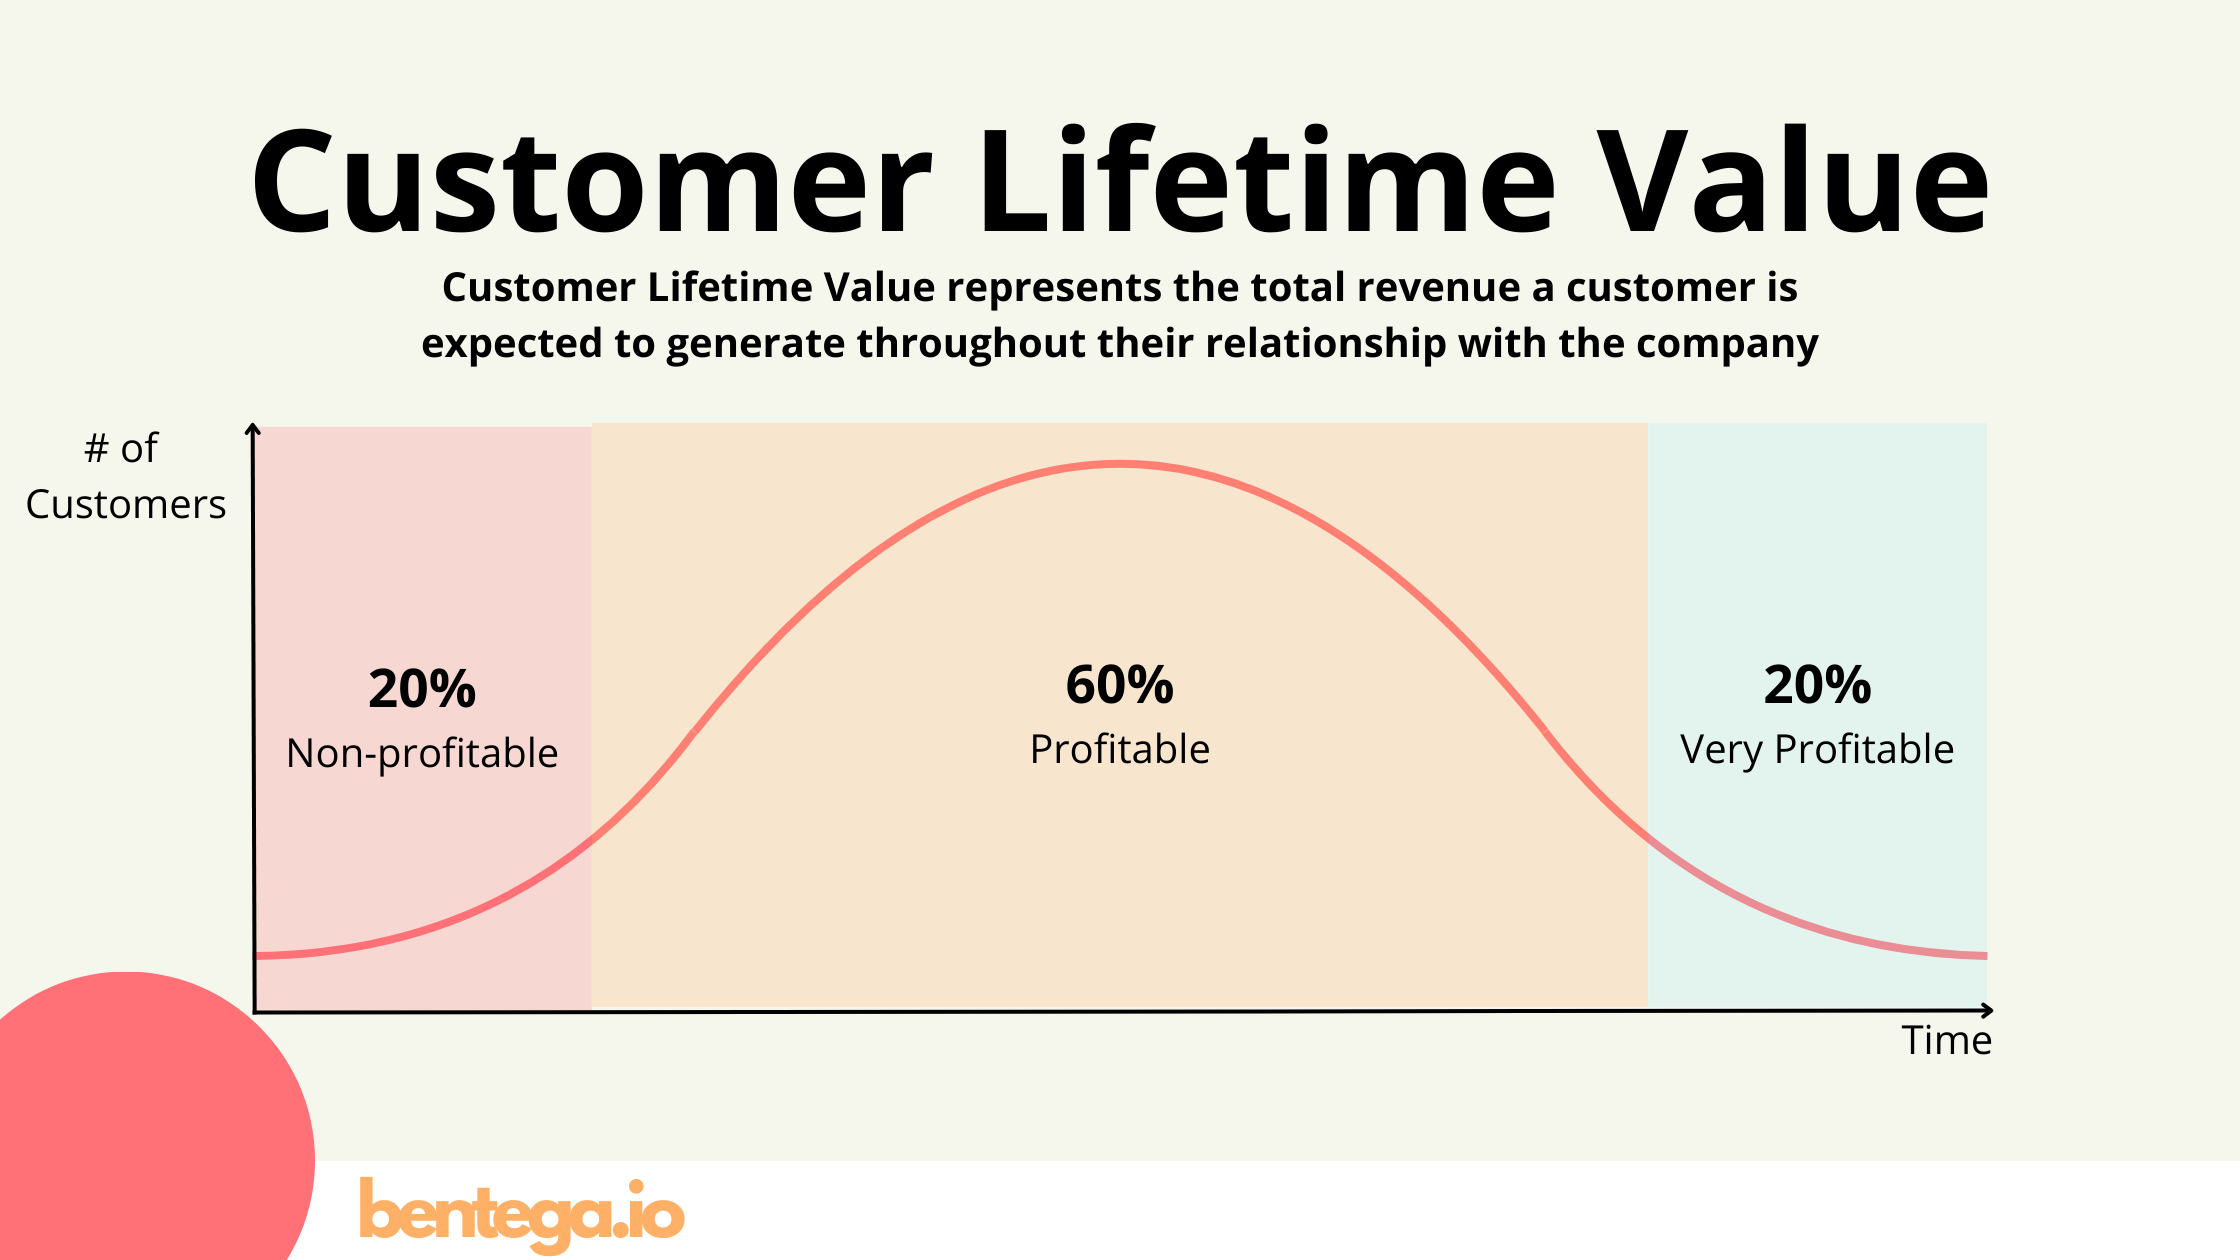

Reference: https://www.bentega.io/blog/customer-lifetime-value-understanding-and-optimizing-clv-in-saas

`Customer Lifetime Value` can be theoritically divided into 3 groups by quantile
- Low (Non-profitable) 20% (<=20)
- Medium (Profitable) 60% (20-80)
- High (Very Profitable) 20% (>80)

Let's take a look on:
- How customer attributes segmented in CLV groups
- How product attributes behave in CLV groups of customer attributes (Customer -> Product)

In [ ]:
X_preprocessed = preprocess_pipeline.transform(X)
y_preprocessed = cap_upper_outliers(y.to_frame(), ['Customer Lifetime Value'])

preprocessed_df = X_preprocessed.copy()
preprocessed_df[scaled_features] = preprocess_pipeline.named_steps['Scaler'].named_transformers_['scaler'].inverse_transform(preprocessed_df[scaled_features])
preprocessed_df['Customer Lifetime Value'] = y_preprocessed
preprocessed_df['Prediction'] = best_model.predict(X_preprocessed)
preprocessed_df['Residual'] = preprocessed_df['Customer Lifetime Value'] - preprocessed_df['Prediction']
preprocessed_df['Residual Percentage'] = abs(preprocessed_df['Customer Lifetime Value'] - preprocessed_df['Prediction']) / preprocessed_df['Customer Lifetime Value']
preprocessed_df.head()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,...,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education,Customer Lifetime Value,Prediction,Residual,Residual Percentage
0,2.0,90.0,571.479602,11828.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,10083.486880,10966.597594,-883.110714,0.087580
1,6.0,62.0,114.514440,44762.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4943.386117,4927.296230,16.089887,0.003255
2,2.0,62.0,257.248789,21514.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,3.0,11981.984810,12292.514869,-310.530059,0.025916
3,1.0,116.0,556.800000,17913.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,4550.856045,4493.682223,57.173822,0.012563
4,1.0,62.0,355.820799,19030.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2372.155492,2366.010268,6.145224,0.002591


In [ ]:
low_medium_bound = y_train.quantile(0.2)
medium_high_bound = y_train.quantile(0.8)

print(f'Low Medium Bound: {low_medium_bound}')
print(f'Medium High Bound: {medium_high_bound}')

Low Medium Bound: 3417.204953
Medium High Bound: 10348.01348


In [ ]:
low_clv_df = preprocessed_df[preprocessed_df['Customer Lifetime Value'] <= low_medium_bound]
medium_clv_df = preprocessed_df[(preprocessed_df['Customer Lifetime Value'] > low_medium_bound) & (preprocessed_df['Customer Lifetime Value'] <= medium_high_bound)]
high_clv_df = preprocessed_df[preprocessed_df['Customer Lifetime Value'] > medium_high_bound]

print(f'Number of low CLV customers: {len(low_clv_df)}')
print(f'Number of medium CLV customers: {len(medium_clv_df)}')
print(f'Number of high CLV customers: {len(high_clv_df)}')

Number of low CLV customers: 1148
Number of medium CLV customers: 3392
Number of high CLV customers: 1129


In [ ]:
customer_features = ['Vehicle Class', 'EmploymentStatus', 'Marital Status', 'Education', 'Income']
product_features = ['Coverage', 'Renew Offer Type', 'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount']

preprocessed_customer_features = []
for feat in customer_features:
    for ff in preprocessed_df.columns:
        if feat in ff:
            preprocessed_customer_features.append(ff)

preprocessed_product_features = []
for feat in product_features:
    for ff in preprocessed_df.columns:
        if feat in ff:
            preprocessed_product_features.append(ff)

preprocessed_customer_features, preprocessed_product_features

(['Vehicle Class_Four-Door Car',
  'Vehicle Class_Luxury Car',
  'Vehicle Class_Luxury SUV',
  'Vehicle Class_SUV',
  'Vehicle Class_Sports Car',
  'Vehicle Class_Two-Door Car',
  'EmploymentStatus_Disabled',
  'EmploymentStatus_Employed',
  'EmploymentStatus_Medical Leave',
  'EmploymentStatus_Retired',
  'EmploymentStatus_Unemployed',
  'Marital Status_Divorced',
  'Marital Status_Married',
  'Marital Status_Single',
  'Education',
  'Income'],
 ['Coverage_Basic',
  'Coverage_Extended',
  'Coverage_Premium',
  'Renew Offer Type_Offer1',
  'Renew Offer Type_Offer2',
  'Renew Offer Type_Offer3',
  'Renew Offer Type_Offer4',
  'Number of Policies',
  'Monthly Premium Auto',
  'Total Claim Amount'])

### 6.2.1. Customer Segment Analysis

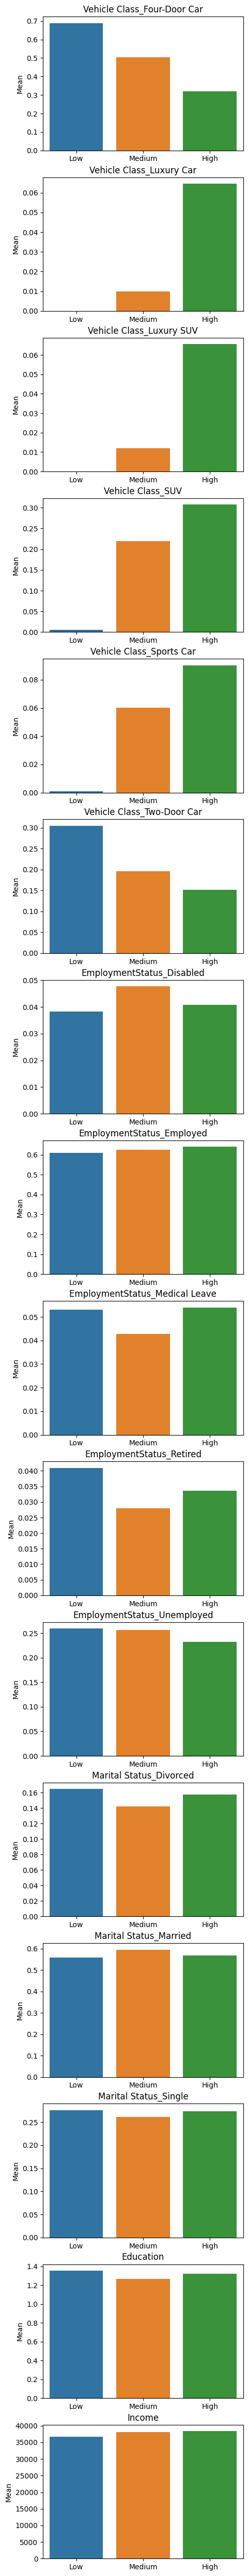

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=len(low_clv_df[preprocessed_customer_features].mean().index.to_list()), figsize=(5, 64))

for i, idx in enumerate(low_clv_df[preprocessed_customer_features].mean().index.to_list()):
    customer_comparison_df = pd.DataFrame(
        data={
            'Mean': [
                low_clv_df[preprocessed_customer_features].mean().loc[idx],
                medium_clv_df[preprocessed_customer_features].mean().loc[idx],
                high_clv_df[preprocessed_customer_features].mean().loc[idx]
            ]
        },
        index=['Low', 'Medium', 'High']
    )

    fig.add_subplot(ax[i])
    plt.title(idx)
    sns.barplot(
        data=customer_comparison_df,
        x=customer_comparison_df.index,
        y='Mean',
        hue=['Low', 'Medium', 'High']
    )
    plt.xlabel('')
plt.show()

- Customers with high clv tends to be `Employed`, higher `Income`, and have `Luxury`, `Sports`, `SUV` vehicle.
- Customers with low clv tends to be `Unemployed` & `Retired`, `Divorced`, lower `Income`, and have `Four-door` vehicle.
- Customers with medium clv are transistion between high and low clv customers characteristics with highest `Disabled` and `Married`.

### 6.2.2. Grouped Customer -> Product Analysis

In [ ]:
grouped_customer_low_clv_df = low_clv_df.groupby(preprocessed_customer_features)[preprocessed_product_features + ['Customer Lifetime Value', 'Prediction', 'Residual Percentage']].mean()
grouped_customer_low_clv_df

Coverage_Basic  \
Vehicle Class_Four-Door Car Vehicle Class_Luxury Car Vehicle Class_Luxury SUV Vehicle Class_SUV Vehicle Class_Sports Car Vehicle Class_Two-Door Car EmploymentStatus_Disabled EmploymentStatus_Employed EmploymentStatus_Medical Leave EmploymentStatus_Retired EmploymentStatus_Unemployed Marital Status_Divorced Marital Status_Married Marital Status_Single Education Income                    
0.0                         0.0                      0.0                      0.0               0.0                      1.0                        0.0                       0.0                       0.0                            0.0                      1.0                         0.0                     0.0                    1.0                   0.0       0.0            0.666667   
                                                                                                                                                                                                                                                                                                                                                                 1.0       0.0            0.666667   
                                                                                                                                                                                                                                                                                                                                                                 2.0       0.0            0.857143   
                                                                                                                                                                                                                                                                                                                    1.0                    0.0                   0.0       0.0            0.625000   
                                                                                                                                                                                                                                                                                                                                                                 1.0       0.0            0.714286   
...                                                                                                                                                                                                                                                                                                                                                                                            ...   
1.0                         0.0                      0.0                      0.0               0.0                      0.0                        1.0                       0.0                       0.0                            0.0                      0.0                         1.0                     0.0                    0.0                   1.0       23170.0        1.000000   
                                                                                                                                                                                                                                                                                                                                                                 2.0       13789.0        0.000000   
                                                                                                                                                                                                                                                                                                                                                                           19864.0        1.000000   
                                                                                  

In [ ]:
grouped_customer_medium_clv_df = medium_clv_df.groupby(preprocessed_customer_features)[preprocessed_product_features + ['Customer Lifetime Value', 'Prediction', 'Residual Percentage']].mean()
grouped_customer_medium_clv_df

Coverage_Basic  \
Vehicle Class_Four-Door Car Vehicle Class_Luxury Car Vehicle Class_Luxury SUV Vehicle Class_SUV Vehicle Class_Sports Car Vehicle Class_Two-Door Car EmploymentStatus_Disabled EmploymentStatus_Employed EmploymentStatus_Medical Leave EmploymentStatus_Retired EmploymentStatus_Unemployed Marital Status_Divorced Marital Status_Married Marital Status_Single Education Income                    
0.0                         0.0                      0.0                      0.0               0.0                      1.0                        0.0                       0.0                       0.0                            0.0                      1.0                         0.0                     0.0                    1.0                   0.0       0.0            0.447368   
                                                                                                                                                                                                                                                                                                                                                                 1.0       0.0            0.750000   
                                                                                                                                                                                                                                                                                                                                                                 2.0       0.0            0.645161   
                                                                                                                                                                                                                                                                                                                                                                 3.0       0.0            1.000000   
                                                                                                                                                                                                                                                                                                                    1.0                    0.0                   0.0       0.0            0.687500   
...                                                                                                                                                                                                                                                                                                                                                                                            ...   
1.0                         0.0                      0.0                      0.0               0.0                      0.0                        1.0                       0.0                       0.0                            0.0                      0.0                         1.0                     0.0                    0.0                   3.0       11621.0        0.000000   
                                                                                                                                                                                                                                                                                                                                                                           20942.0        0.000000   
                                                                                                                                                                                                                                                                                                                                                                           22886.0        1.000000   
                                                                                  

In [ ]:
grouped_customer_high_clv_df = high_clv_df.groupby(preprocessed_customer_features)[preprocessed_product_features + ['Customer Lifetime Value', 'Prediction', 'Residual Percentage']].mean()
grouped_customer_high_clv_df

Coverage_Basic  \
Vehicle Class_Four-Door Car Vehicle Class_Luxury Car Vehicle Class_Luxury SUV Vehicle Class_SUV Vehicle Class_Sports Car Vehicle Class_Two-Door Car EmploymentStatus_Disabled EmploymentStatus_Employed EmploymentStatus_Medical Leave EmploymentStatus_Retired EmploymentStatus_Unemployed Marital Status_Divorced Marital Status_Married Marital Status_Single Education Income                    
0.0                         0.0                      0.0                      0.0               0.0                      1.0                        0.0                       0.0                       0.0                            0.0                      1.0                         0.0                     0.0                    1.0                   0.0       0.0            0.625000   
                                                                                                                                                                                                                                                                                                                                                                 1.0       0.0            0.000000   
                                                                                                                                                                                                                                                                                                                                                                 2.0       0.0            0.714286   
                                                                                                                                                                                                                                                                                                                    1.0                    0.0                   0.0       0.0            0.333333   
                                                                                                                                                                                                                                                                                                                                                                 1.0       0.0            0.000000   
...                                                                                                                                                                                                                                                                                                                                                                                            ...   
1.0                         0.0                      0.0                      0.0               0.0                      0.0                        1.0                       0.0                       0.0                            0.0                      0.0                         0.0                     1.0                    0.0                   1.0       29879.0        0.000000   
                                                                                                                                                                                                                                                                                                                                                                 2.0       11538.0        0.000000   
                                                                                                                                                                                                                                                                                                                                                                           26410.0        0.000000   
                                                                                  

In [ ]:
customer_low_medium_idx = []
for idx in grouped_customer_low_clv_df.index.to_list():
    try:
        grouped_customer_medium_clv_df.loc[idx]
        customer_low_medium_idx.append(idx)
    except:
        pass

customer_medium_high_idx = []
for idx in grouped_customer_medium_clv_df.index.to_list():
    try:
        grouped_customer_high_clv_df.loc[idx]
        customer_medium_high_idx.append(idx)
    except:
        pass

#### 6.2.2.1. Low - Medium CLV

In [ ]:
grouped_customer_low_clv_df.loc[customer_low_medium_idx].mean()

,0
Coverage_Basic,0.768172
Coverage_Extended,0.230924
Coverage_Premium,0.000903
Renew Offer Type_Offer1,0.464916
Renew Offer Type_Offer2,0.256766
Renew Offer Type_Offer3,0.170627
Renew Offer Type_Offer4,0.107692
Number of Policies,1.003527
Monthly Premium Auto,78.382141
Total Claim Amount,485.329274


In [ ]:
grouped_customer_medium_clv_df.loc[customer_low_medium_idx].mean()

,0
Coverage_Basic,0.535156
Coverage_Extended,0.366547
Coverage_Premium,0.098297
Renew Offer Type_Offer1,0.571764
Renew Offer Type_Offer2,0.216054
Renew Offer Type_Offer3,0.141008
Renew Offer Type_Offer4,0.071173
Number of Policies,4.083768
Monthly Premium Auto,87.583788
Total Claim Amount,483.403346


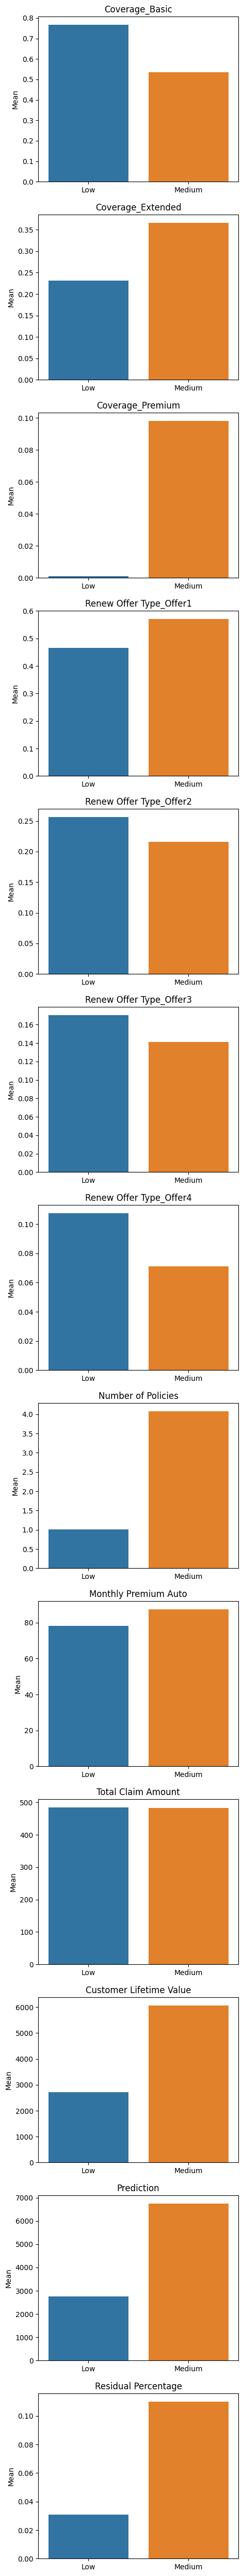

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=len(grouped_customer_low_clv_df.loc[customer_low_medium_idx].mean().index.to_list()), figsize=(5, 64))

for i, idx in enumerate(grouped_customer_low_clv_df.loc[customer_low_medium_idx].mean().index.to_list()):
    low_medium_customer_product_comparison_df = pd.DataFrame(
        data={
            'Mean': [
                grouped_customer_low_clv_df.loc[customer_low_medium_idx].mean().loc[idx],
                grouped_customer_medium_clv_df.loc[customer_low_medium_idx].mean().loc[idx]
            ]
        },
        index=['Low', 'Medium']
    )

    fig.add_subplot(ax[i])
    plt.title(idx)
    sns.barplot(
        data=low_medium_customer_product_comparison_df,
        x=low_medium_customer_product_comparison_df.index,
        y='Mean',
        hue=['Low', 'Medium']
    )
    plt.xlabel('')
plt.show()

In the same customer group Low and Medium CLV, higher CLV comes with:
- higher `Extended` and `Premium` `Coverage`
- More `Number of Policies`, `Monthly Premium Auto`
- More `Offer1` of `Renew Offer Type`
- But also bigger percentage `Residual Percentage` of roughly around `11%` compares to low CLV around `3%`

#### 6.2.2.2. Medium - High CLV

In [ ]:
grouped_customer_medium_clv_df.loc[customer_medium_high_idx].mean()

,0
Coverage_Basic,0.609154
Coverage_Extended,0.318191
Coverage_Premium,0.072655
Renew Offer Type_Offer1,0.538200
Renew Offer Type_Offer2,0.210074
Renew Offer Type_Offer3,0.192339
Renew Offer Type_Offer4,0.059388
Number of Policies,3.479934
Monthly Premium Auto,107.237442
Total Claim Amount,597.080288


In [ ]:
grouped_customer_high_clv_df.loc[customer_medium_high_idx].mean()

,0
Coverage_Basic,0.490503
Coverage_Extended,0.360017
Coverage_Premium,0.149480
Renew Offer Type_Offer1,0.541233
Renew Offer Type_Offer2,0.214418
Renew Offer Type_Offer3,0.167421
Renew Offer Type_Offer4,0.076927
Number of Policies,2.476834
Monthly Premium Auto,111.913095
Total Claim Amount,643.318046


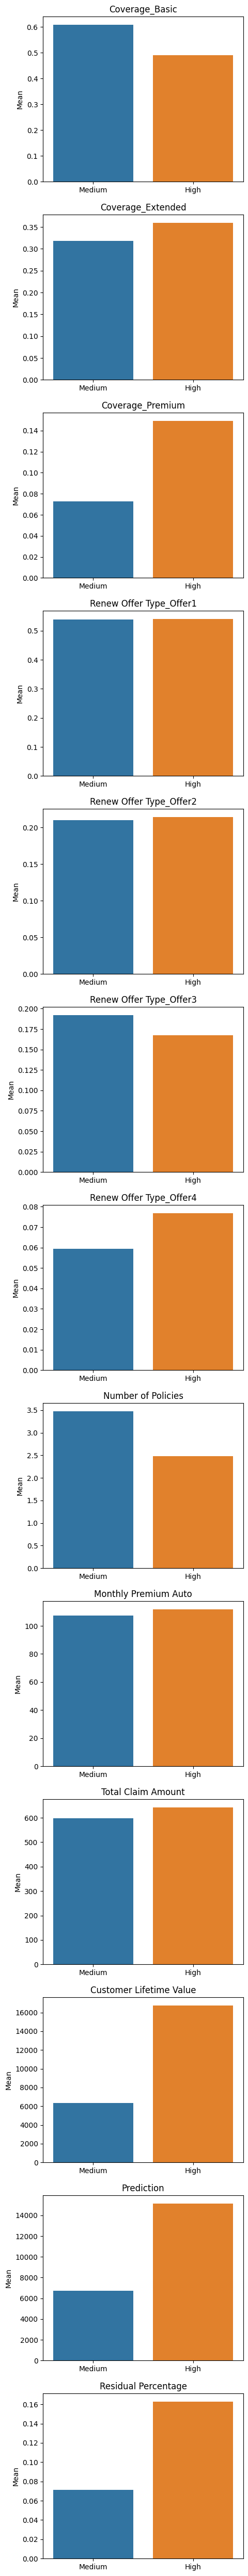

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=len(grouped_customer_medium_clv_df.loc[customer_medium_high_idx].mean().index.to_list()), figsize=(5, 64))

for i, idx in enumerate(grouped_customer_medium_clv_df.loc[customer_medium_high_idx].mean().index.to_list()):
    medium_high_customer_product_comparison_df = pd.DataFrame(
        data={
            'Mean': [
                grouped_customer_medium_clv_df.loc[customer_medium_high_idx].mean().loc[idx],
                grouped_customer_high_clv_df.loc[customer_medium_high_idx].mean().loc[idx]
            ]
        },
        index=['Medium', 'High']
    )
    fig.add_subplot(ax[i])
    plt.title(idx)
    sns.barplot(
        data=medium_high_customer_product_comparison_df,
        x=medium_high_customer_product_comparison_df.index,
        y='Mean',
        hue=['Medium', 'High']
    )
    plt.xlabel('')
plt.show()

In the same customer group Medium and High CLV, higher CLV comes with:
- higher `Extended` and more significant in `Premium` `Coverage`
- Lower `Number of Policies`
- More `Monthly Premium Auto` and `Total Claim Amount`
- More `Offer4` of `Renew Offer Type`
- But also bigger percentage `Residual Percentage` of roughly around `16%` compares to medium CLV around `7%`

#### 6.2.2.3. Simulation

In [ ]:
sim_customer_low_medium_clv_df = low_clv_df.copy().drop(columns=['Prediction', 'Residual', 'Residual Percentage'])
sim_customer_medium_high_clv_df = medium_clv_df.copy().drop(columns=['Prediction', 'Residual', 'Residual Percentage'])

Low -> Medium

In [ ]:
sim_df_customer_low_medium_idx = []
for i in range(len(customer_low_medium_idx)):
    idx = sim_customer_low_medium_clv_df[
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[0]] == customer_low_medium_idx[i][0]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[1]] == customer_low_medium_idx[i][1]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[2]] == customer_low_medium_idx[i][2]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[3]] == customer_low_medium_idx[i][3]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[4]] == customer_low_medium_idx[i][4]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[5]] == customer_low_medium_idx[i][5]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[6]] == customer_low_medium_idx[i][6]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[7]] == customer_low_medium_idx[i][7]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[8]] == customer_low_medium_idx[i][8]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[9]] == customer_low_medium_idx[i][9]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[10]] == customer_low_medium_idx[i][10]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[11]] == customer_low_medium_idx[i][11]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[12]] == customer_low_medium_idx[i][12]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[13]] == customer_low_medium_idx[i][13]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[14]] == customer_low_medium_idx[i][14]) &
        (sim_customer_low_medium_clv_df[grouped_customer_medium_clv_df.index.names[15]] == customer_low_medium_idx[i][15])
    ].index.to_list()

    for x in idx:
        sim_df_customer_low_medium_idx.append(x)


    selected_cols = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium', 'Renew Offer Type_Offer1','Renew Offer Type_Offer2','Renew Offer Type_Offer3','Renew Offer Type_Offer4']
    duplicated_df = pd.concat([pd.DataFrame(grouped_customer_medium_clv_df.loc[customer_low_medium_idx[i], selected_cols]).transpose()] * len(idx), ignore_index=True).set_index(pd.Series(idx))

    sim_customer_low_medium_clv_df.loc[
        idx,
        selected_cols
    ] = duplicated_df

sim_customer_low_medium_clv_df[scaled_features] = preprocess_pipeline.named_steps['Scaler'].named_transformers_['scaler'].transform(sim_customer_low_medium_clv_df[scaled_features])
sim_customer_low_medium_clv_df.loc[sim_df_customer_low_medium_idx, 'Customer Lifetime Value'] = best_model.predict(sim_customer_low_medium_clv_df.drop(columns=['Customer Lifetime Value']).loc[sim_df_customer_low_medium_idx])

In [ ]:
print(f'Count Low CLV: {len(low_clv_df)}')
print(f"Total Low CLV: {low_clv_df['Customer Lifetime Value'].sum()}")
print(f"Mean Low CLV: {low_clv_df['Customer Lifetime Value'].mean()}")
print(f"Count Customer -> Product Low -> Medium CLV: {len(low_clv_df.loc[sim_df_customer_low_medium_idx, 'Customer Lifetime Value'])}")
print(f"Percentage Customer -> Product Low -> Medium CLV: {len(low_clv_df.loc[sim_df_customer_low_medium_idx, 'Customer Lifetime Value']) / len(low_clv_df) * 100} %")
print(f"Original Customer -> Product Total Low CLV: {low_clv_df.loc[sim_df_customer_low_medium_idx, 'Customer Lifetime Value'].sum()}")
print(f"Simulated Customer -> Product Total Low -> Medium CLV: {sim_customer_low_medium_clv_df.loc[sim_df_customer_low_medium_idx, 'Customer Lifetime Value'].sum()}")
print(f"Simulated Percentage Increased Low -> Medium CLV from Total Low CLV: {(sim_customer_low_medium_clv_df['Customer Lifetime Value'].sum() - low_clv_df['Customer Lifetime Value'].sum()) / low_clv_df['Customer Lifetime Value'].sum() * 100} %")
print(f"Simulated Total Increased Low -> Medium CLV from Total Low CLV: {(sim_customer_low_medium_clv_df['Customer Lifetime Value'].sum() - low_clv_df['Customer Lifetime Value'].sum())}")

Count Low CLV: 1148
Total Low CLV: 3091314.2654560003
Mean Low CLV: 2692.7824611986066
Count Customer -> Product Low -> Medium CLV: 297
Percentage Customer -> Product Low -> Medium CLV: 25.871080139372822 %
Original Customer -> Product Total Low CLV: 761319.356252
Simulated Customer -> Product Total Low -> Medium CLV: 1663552.0790782718
Simulated Percentage Increased Low -> Medium CLV from Total Low CLV: 29.186056329125204 %
Simulated Total Increased Low -> Medium CLV from Total Low CLV: 902232.7228262713


By focusing in `25.87%` of Low CLV customers that have same customer attributes as in medium CLV, if we can make them have product features same as mean of product features in medium CLV, the total low group CLV can be increased by `29.19%`, total of `902232.72`

Medium -> High

In [ ]:
sim_df_customer_medium_high_idx = []
for i in range(len(customer_medium_high_idx)):
    idx = sim_customer_medium_high_clv_df[
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[0]] == customer_medium_high_idx[i][0]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[1]] == customer_medium_high_idx[i][1]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[2]] == customer_medium_high_idx[i][2]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[3]] == customer_medium_high_idx[i][3]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[4]] == customer_medium_high_idx[i][4]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[5]] == customer_medium_high_idx[i][5]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[6]] == customer_medium_high_idx[i][6]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[7]] == customer_medium_high_idx[i][7]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[8]] == customer_medium_high_idx[i][8]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[9]] == customer_medium_high_idx[i][9]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[10]] == customer_medium_high_idx[i][10]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[11]] == customer_medium_high_idx[i][11]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[12]] == customer_medium_high_idx[i][12]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[13]] == customer_medium_high_idx[i][13]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[14]] == customer_medium_high_idx[i][14]) &
        (sim_customer_medium_high_clv_df[grouped_customer_high_clv_df.index.names[15]] == customer_medium_high_idx[i][15])
    ].index.to_list()

    for x in idx:
        sim_df_customer_medium_high_idx.append(x)


    selected_cols = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium', 'Renew Offer Type_Offer1','Renew Offer Type_Offer2','Renew Offer Type_Offer3','Renew Offer Type_Offer4']
    duplicated_df = pd.concat([pd.DataFrame(grouped_customer_high_clv_df.loc[customer_medium_high_idx[i], selected_cols]).transpose()] * len(idx), ignore_index=True).set_index(pd.Series(idx))

    sim_customer_medium_high_clv_df.loc[
        idx,
        selected_cols
    ] = duplicated_df

sim_customer_medium_high_clv_df[scaled_features] = preprocess_pipeline.named_steps['Scaler'].named_transformers_['scaler'].transform(sim_customer_medium_high_clv_df[scaled_features])
sim_customer_medium_high_clv_df.loc[sim_df_customer_medium_high_idx, 'Customer Lifetime Value'] = best_model.predict(sim_customer_medium_high_clv_df.drop(columns=['Customer Lifetime Value']).loc[sim_df_customer_medium_high_idx])

In [ ]:
print(f'Count Medium CLV: {len(medium_clv_df)}')
print(f"Total Medium CLV: {medium_clv_df['Customer Lifetime Value'].sum()}")
print(f"Mean Medium CLV: {medium_clv_df['Customer Lifetime Value'].mean()}")
print(f"Count Customer -> Product Medium -> High CLV: {len(medium_clv_df.loc[sim_df_customer_medium_high_idx, 'Customer Lifetime Value'])}")
print(f"Percentage Customer -> Product Medium -> High CLV: {len(medium_clv_df.loc[sim_df_customer_medium_high_idx, 'Customer Lifetime Value']) / len(medium_clv_df) * 100} %")
print(f"Original Customer -> Product Total Medium CLV: {medium_clv_df.loc[sim_df_customer_medium_high_idx, 'Customer Lifetime Value'].sum()}")
print(f"Simulated Customer -> Product Total Medium -> High CLV: {sim_customer_medium_high_clv_df.loc[sim_df_customer_medium_high_idx, 'Customer Lifetime Value'].sum()}")
print(f"Simulated Percentage Increased Medium -> High CLV from Total Medium CLV: {(sim_customer_medium_high_clv_df['Customer Lifetime Value'].sum() - medium_clv_df['Customer Lifetime Value'].sum()) / medium_clv_df['Customer Lifetime Value'].sum() * 100} %")
print(f"Simulated Total Increased Medium -> High CLV from Total Medium CLV: {(sim_customer_medium_high_clv_df['Customer Lifetime Value'].sum() - medium_clv_df['Customer Lifetime Value'].sum())}")

Count Medium CLV: 3392
Total Medium CLV: 21350296.551517002
Mean Medium CLV: 6294.309124857607
Count Customer -> Product Medium -> High CLV: 816
Percentage Customer -> Product Medium -> High CLV: 24.056603773584907 %
Original Customer -> Product Total Medium CLV: 4996703.6160780005
Simulated Customer -> Product Total Medium -> High CLV: 10729151.52503409
Simulated Percentage Increased Medium -> High CLV from Total Medium CLV: 26.849500170285832 %
Simulated Total Increased Medium -> High CLV from Total Medium CLV: 5732447.908956088


By focusing in `24.06%` of medium CLV customers that have same customer attributes as in high CLV, if we can make them have product features same as mean of product features in high CLV, the total medium group CLV can be increased by `26.85%`, total of `5732447.91`

In [5]:
overall_improvement_percentage = (902232.72 + 5732447.91) / df['Customer Lifetime Value'].sum() * 100
print(f"Simulated Overall Increased CLV: {902232.72 + 5732447.91}")
print(f"Simulated Overall Increased CLV (%): {overall_improvement_percentage} %")

Simulated Overall Increased CLV: 6634680.63
Simulated Overall Increased CLV (%): 14.574873788370502 %


# 7. Conclusions and Recommendations

### Final Conclusion and Recommendations

**1. Final Solution Conclusion:**
* **Model Prediction:**
    * The developed **Random Forest Regressor model** demonstrates strong overall CLV prediction performance, achieving an **MAE of 1059.29**, **MAPE 0.09**, and an **RMSLE of 0.1692** on the test data. This means, on average, the model's proportional prediction error for CLV is approximately `9%`, and its absolute error is around `1059`. These metrics are directly relevant for departments in assessing the accuracy of customer value estimations.
* **Insights Analysis:** Features such as `Number of Policies`, `Monthly Premium Auto`, `Income`, and `Total Claim Amount` have proven to be key drivers of CLV.
    * Higher CLV seems to have `Number of Policies` of 2, with lower than that becomes low CLV, but too many becomes medium group CLV.
    * The bigger `Monthly Premium Auto`, `Income`, and `Total Claim Amount` tends to lead the bigger CLV.
    * Customer Segmentations:
        * Customers with high clv tends to be `Employed`, higher `Income`, and have `Luxury`, `Sports`, `SUV` vehicle.
        * Customers with low clv tends to be `Unemployed` & `Retired`, `Divorced`, lower `Income`, and have `Four-door` vehicle.
        * Customers with medium clv are transistion between high and low clv customers characteristics with highest `Disabled` and `Married`.
    * Customer -> Product Analysis:
        * In the same customer group **Medium** and **High CLV**, higher CLV comes with:
            * higher `Extended` and more significant in `Premium` `Coverage`
            * Lower `Number of Policies`
            * More `Monthly Premium Auto` and `Total Claim Amount`
            * More `Offer4` of `Renew Offer Type`
            * But also bigger percentage `Residual Percentage` of roughly around `16%` compares to medium CLV around `7%`
        * In the same customer group **Low** and **Medium CLV**, higher CLV comes with:
            * higher `Extended` and `Premium` `Coverage`
            * More `Number of Policies`, `Monthly Premium Auto`
            * More `Offer1` of `Renew Offer Type`
            * But also bigger percentage `Residual Percentage` of roughly around `11%` compares to low CLV around `3%`

**2. Recommendations for When the Model is Good and Not Good to Use (Model Trustworthiness):**

* **Model Can Be Trusted (Good to Use):**
    * **For Predicting Low to Medium CLV (e.g., below the 0.6 quantile or around 7,500):** In this range, residual plots show the model is highly accurate and consistent. Predictions for these segments can be relied upon for standard customer retention and development strategies.
    * **For Identifying CLV Drivers:** SHAP plots provide very clear insights into the key features influencing CLV. This information can be utilized by product, marketing, and sales teams to shape strategies for increasing customer value and improving products/services.
    * **For Initial Segmentation and Targeting:** The model can help identify distinct customer segments based on their potential value, which is a good starting point for targeting strategies.

* **Model Is Less Trustworthy (Use with Caution):**
    * **For Highly Accurate Point Predictions on High CLV (especially above the 0.8 quantile or around 10,000, approaching the 22,500 capping limit):** The model consistently **underpredicts** CLV for high-value customers. Both absolute and percentage errors become significantly larger in this segment. Therefore, do not over-rely on single-point predictions for very high CLV customers from this model. **Predictions in this segment should be treated as minimum estimates**.
    * **When Extrapolation is Required:** As Random Forest is not designed for extrapolation, the model will not accurately predict CLV values far beyond what was seen in the training data, even if theoretically, such customers have higher potential value.

**3. Impact of Solution Implementation on Business Processes:**

In Overall, by doing simulation of CLV prediction for same customer groups to have in average the same products like its higher CLV groups, predicted future revenue increased by `6634680.63` `(14.57%)` with targeting `25.87%` of low CLV customer group and `24.06%` of medium CLV customer group. It can be applicable for example:
* **Marketing:** Enables personalized customer segmented campaigns based on CLV predictions, more efficient budget allocation to high-potential segments such as focus more on customer segment with `Luxury`, `Sports`, `SUV` vehicles and `Employed` and higher `Income`.
* **Sales:** Prioritizes leads or customers predicted to have high CLV and upsell targeting `Number of Policies` of 2.
* **Product/Service Management:** Informs decisions on product development or feature enhancements most likely to increase CLV, based on value-driving features. Prioritize product with `Offer4` compare to `Offer1` and `Premium` `Extended` Coverage rather than `Basic`.
* **Finance & Strategy:** Provides more accurate revenue projections and enables more strategic resource allocation based on future customer value estimates.

**4. Project Limitations and Recommendations for Future Improvement:**

* **Data Limitations:**
    * **Historical Data Availability:** Assumes that the data used consists of static features. If no deep historical transaction or interaction data is available (e.g., purchase frequency, relationship duration), the model might miss crucial signals for more accurate CLV, customer CLV projections, and churn predictions.

* **Model Limitations (Random Forest Regressor):**
    * **Extrapolation Limitation:** Random Forest, as a tree-based model, is inherently incapable of extrapolating values beyond the range of its training data. This contributes to the underprediction for very high CLV customers who might represent extreme cases.

* **Recommendations for Future Improvement:**
    1.  **Additional Features:**
        * **Temporal/History Features:** If historical customer data is available (e.g., claims amount per year, premium changes over time), leverage it to create richer features.
        * **Customer ID:** for better understanding specific customer behavior along the time like **Churn**, **CLV Trends / Average**, **Policy**, etc.
        * **More Customer Features:** like **location**, **age**, **gender**, etc. for more specific customer segmentation
        * **More Product Features:** like **policy** to enrich product related insights, combined with customer features can lead to open up more detail customer -> product related strategies
    2.  **External Validation:** Perform model validation with new data from different time periods to ensure model stability and generalization in the future.